# Predict Customer Churn

- author: Marco Russo
- date: 25/26/27 january 2020
- version: v1.0

## What  is Churn Rate

Churn rate (sometimes called attrition rate), in its broadest sense, is a measure of the number of individuals or items moving out of a collective group over a specific period. It is one of two primary factors that determine the steady-state level of customers a business will support.

The term is used in many contexts, but is most widely applied in business with respect to a contractual customer base, for example in businesses with a subscriber-based service model such as mobile telephone networks and pay TV operators. The term is also used to refer to participant turnover in peer-to-peer networks. **Churn rate is an input into customer lifetime value modeling**, and can be part of a simulator used to measure return on marketing investment using marketing mix modeling.

## CVL and Data Science

Predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

To select the most appropiate method, **other aspects from accuracy**, which is the most common parameter, can and should be considered as form example: robustness, speed, interpretability, and ease of use. In this practice we propose a methodology for evaluating statisticl models for classification with the use of a composite indicator. This one measures multidimensional concepts which cannot be captured by a single parameter and help decision makers to solve this complex problem.

We test our proposal on a set of five churn classification models drawn from a real experience, three of the, being based on individual classifiers(**logistic regression, decision tree, neural networks**), and other two constructed by using combined classifiers (**AdaBoost and Random Forest**).

We will consider four different alternatives to add another values as input variables selection that will be influence on the performance of the churn prediction model: original variables, aggregate variables, PCA (Principal Component Analysis), and stacking procedure.



## Main goal

The goal of the exercise is:
- Determine and present in an intuitive way the churn ratio at the time the data was taken and identify which factors are the main contributors to customer abandonment 
- Create a prediction model to determine if a customer is going to churn or not and a model that determines the probability that a customer will churn. 
- Illustrate the performance and business interest use of your model with the tools you deem appropriate.


### Business understanding

But how to start working with churn rate prediction? Which data is needed? And what are the steps to implementation?

As with any machine learning task, data science specialists first need data to work with. Depending on the goal, researchers define what data they must collect. Next, selected data is prepared, preprocessed, and transformed in a form suitable for building machine learning models. Finding the right methods to training machines, fine-tuning the models, and selecting the best performers is another significant part of the work. Once a model that makes predictions with the highest accuracy is chosen, it can be put into production.

The overall scope of work data scientists carry out to build ML-powered systems capable to forecast customer attrition may look like the following:

- Understanding a problem and final goal
- Data collection
- Data preparation and preprocessing
- Modeling and testing
- Model deployment and monitoring

### Understanding a problem and a final goal

It’s important to understand what insights one needs to get from the analysis. In short, we must decide what question to ask and consequently what type of machine learning problem to solve: classification or regression.

## Model Pipeline

Companies that constantly monitor how people engage with products, encourage clients to share opinions, and solve their issues promptly have greater opportunities to maintain mutually beneficial client relationships.

And now imagine a company that has been gathering customer data for a while, so it can use it to identify behavior patterns of potential churners, segment these at-risk customers, and take appropriate actions to gain back their trust. Those following a proactive approach to customer churn management use predictive analytics. That’s one of four analytics types that entails forecasting the probability of future outcomes, events, or values by analyzing current and historical data. Predictive analytics utilizes various statistical techniques, such as data mining (pattern recognition) and machine learning (ML).

The prediction process is heavily data-driven and often utilizes advanced machine learning techniques. In this post, we'll take a look at what types of customer data are typically used, do some preliminary analysis of the data, and generate churn prediction models — all with Spark and its machine learning frameworks.

![](https://github.com/marcusRB/datascience/blob/master/Churn%20Prediction/img/Picture1.png?raw=true)

## Workflow stages
The competition solution workflow goes through seven stages described in the Data Science Solutions book.

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

In [1]:
# Install packages and dependencies
##!pip install plotly

## Check the versions of libraries

In [237]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.10 |Anaconda, Inc.| (default, Jan  7 2020, 15:01:53) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
scipy: 1.2.1
numpy: 1.16.3
matplotlib: 3.1.0
pandas: 0.24.2
sklearn: 0.20.3


***

## Import Libraries

In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from xgboost import XGBClassifier

## Load metrics for predictive modeling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, normalize
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn import metrics

## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

***

## Load dataset

In [4]:
#!pip install PyDrive
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = "1rULpKSf8wFjJt0p0uScBZEOSUbmxQ9wN"
#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()),10)

In [5]:
#dataset = downloaded.GetContentString

In [6]:
# After check firt results, we set a semicolon delimiter

#Use the google drive API function
#downloaded.GetContentFile('client_dataset.csv')
dataset = pd.read_csv('client_dataset.csv', delimiter=";")
dataset.head(5)

,idClient,Score,CountryLocation,Gender,Age,Tenure,Games Balance,NumOfProducts,HasPremiumAccess,IsActiveMember,Cumulative score,Churn
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


***

## Data description

We check the dataset, stats, variables one by one

In [7]:
# Check dataframe structure
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
idClient            10000 non-null int64
Score               10000 non-null int64
CountryLocation     10000 non-null object
Gender              10000 non-null object
Age                 10000 non-null int64
Tenure              10000 non-null int64
Games Balance       10000 non-null float64
NumOfProducts       10000 non-null int64
HasPremiumAccess    10000 non-null int64
IsActiveMember      10000 non-null int64
Cumulative score    10000 non-null float64
Churn               10000 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
# Check dataframe dataType
dataset.dtypes

idClient              int64
Score                 int64
CountryLocation      object
Gender               object
Age                   int64
Tenure                int64
Games Balance       float64
NumOfProducts         int64
HasPremiumAccess      int64
IsActiveMember        int64
Cumulative score    float64
Churn                 int64
dtype: object

In [9]:
# Check dataframe basico info
dataset.count

<bound method DataFrame.count of       idClient  Score CountryLocation  Gender  Age  Tenure  Games Balance  \
0            1    619          France  Female   42       2           0.00   
1            2    608           Spain  Female   41       1       83807.86   
2            3    502          France  Female   42       8      159660.80   
3            4    699          France  Female   39       1           0.00   
4            5    850           Spain  Female   43       2      125510.82   
5            6    645           Spain    Male   44       8      113755.78   
6            7    822          France    Male   50       7           0.00   
7            8    376         Germany  Female   29       4      115046.74   
8            9    501          France    Male   44       4      142051.07   
9           10    684          France    Male   27       2      134603.88   
10          11    528          France    Male   31       6      102016.72   
11          12    497           Spain    Ma

In [10]:
# Check unique values 
print ("\nUnique values :  \n",dataset.nunique())


Unique values :  
 idClient            10000
Score                 460
CountryLocation         3
Gender                  2
Age                    70
Tenure                 11
Games Balance        6382
NumOfProducts           4
HasPremiumAccess        2
IsActiveMember          2
Cumulative score     9999
Churn                   2
dtype: int64


In [11]:
# Check dataframe basic stats datas
dataset.describe()

,idClient,Score,Age,Tenure,Games Balance,NumOfProducts,HasPremiumAccess,IsActiveMember,Cumulative score,Churn
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
# Check dataframe basic info
print("Dataset has {0} Rows".format(dataset.shape[0]))
print("Dataset has {0} Cols".format(dataset.shape[1]))

Dataset has 10000 Rows
Dataset has 12 Cols


The dataset has 10,000 values and 12 dimensions or variables. We check them one by one.

***

## EDA, Visualization and Transformation data

We analyze all variable one by one and check null value, errors or we create new variables.

In [13]:
# Check null and NA values for both dataset
print(dataset.isna().sum())

idClient            0
Score               0
CountryLocation     0
Gender              0
Age                 0
Tenure              0
Games Balance       0
NumOfProducts       0
HasPremiumAccess    0
IsActiveMember      0
Cumulative score    0
Churn               0
dtype: int64


> Dataset hasn't NA values

In [14]:
# Check null and null values for both dataset
print(dataset.isnull().sum())

idClient            0
Score               0
CountryLocation     0
Gender              0
Age                 0
Tenure              0
Games Balance       0
NumOfProducts       0
HasPremiumAccess    0
IsActiveMember      0
Cumulative score    0
Churn               0
dtype: int64


> Dataset hasn't NULL values

**Customer Churn** dataset has 10k observations, not null with 12 variables:

- 2 categorical variables
- 10 numerical variables

Now, we check variables one by one and, in case of necessary, transform it or normalize it.

* * *

#### `idClient`
This variable it seems a classic ID for each customer. 

In [15]:
# Check first 10 elements
print(dataset['idClient'].head(10))

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: idClient, dtype: int64


In [16]:
# Check last 10 elements
print(dataset['idClient'].tail(10))

9990     9991
9991     9992
9992     9993
9993     9994
9994     9995
9995     9996
9996     9997
9997     9998
9998     9999
9999    10000
Name: idClient, dtype: int64


In [17]:
print("IdClient variable has {0} total observations and {1} are unique only.".format(dataset['idClient'].count(),dataset['idClient'].nunique()))

IdClient variable has 10000 total observations and 10000 are unique only.


> This variable will be our output with churn variable as a result of our prediction model.

* * *

#### `Score`
This continuous numerical variable is score of the customer. 

In [18]:
print("Score variable has {0} total observations and {1} are unique only.".format(dataset['Score'].count(),dataset['Score'].nunique()))

Score variable has 10000 total observations and 460 are unique only.


In [19]:
# Check first 10 elements
print(dataset['Score'].head(10))

0    619
1    608
2    502
3    699
4    850
5    645
6    822
7    376
8    501
9    684
Name: Score, dtype: int64


In [20]:
# Check last 10 elements
print(dataset['Score'].tail(10))

9990    714
9991    597
9992    726
9993    644
9994    800
9995    771
9996    516
9997    709
9998    772
9999    792
Name: Score, dtype: int64


In [21]:
# Check basic stats
print(dataset['Score'].describe())

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: Score, dtype: float64


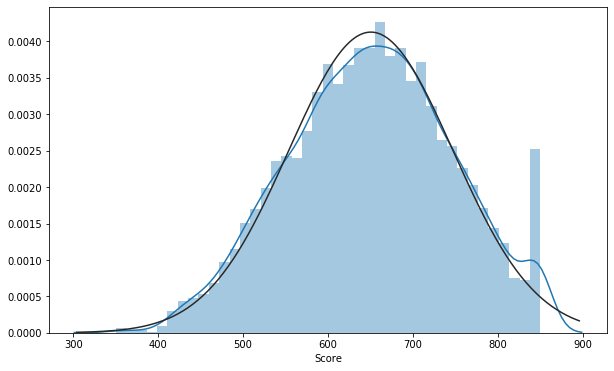

In [22]:
# Plot the distribution
plt.figure(figsize= [10.0, 6.0])
sns.distplot(dataset['Score'], fit=norm)

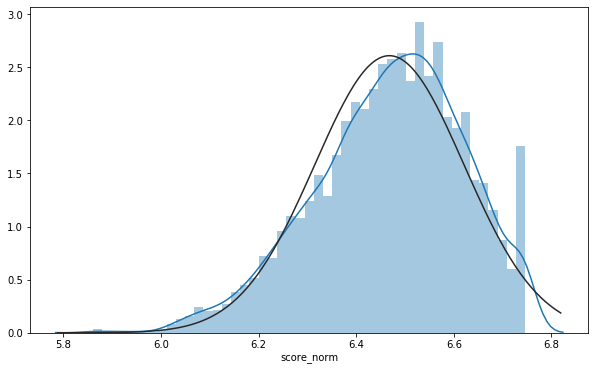

In [23]:
# Normalize the data
plt.figure(figsize= [10.0, 6.0])
dataset['score_norm'] = np.log1p(dataset['Score'])
sns.distplot(dataset['score_norm'], fit=norm)

In [24]:
# Evaluate Score and Churn as absolute values
pd.crosstab(dataset['Score'], dataset['Churn'])

Churn,0,1
Score,,
350,0,5
351,0,1
358,0,1
359,0,1
363,0,1
365,0,1
367,0,1
373,0,1
376,0,2


In [25]:
# Evaluate Score and Churn as relatives values
dataset[["Score", "Churn"]].groupby(['Score'], as_index=False).mean()

,Score,Churn
0,350,1.000000
1,351,1.000000
2,358,1.000000
3,359,1.000000
4,363,1.000000
5,365,1.000000
6,367,1.000000
7,373,1.000000
8,376,1.000000
9,382,1.000000


In [26]:
# We can transform score in 4 equal intervals
pd.qcut(dataset['Score'], q=4)

0         (584.0, 652.0]
1         (584.0, 652.0]
2       (349.999, 584.0]
3         (652.0, 718.0]
4         (718.0, 850.0]
5         (584.0, 652.0]
6         (718.0, 850.0]
7       (349.999, 584.0]
8       (349.999, 584.0]
9         (652.0, 718.0]
10      (349.999, 584.0]
11      (349.999, 584.0]
12      (349.999, 584.0]
13      (349.999, 584.0]
14        (584.0, 652.0]
15        (584.0, 652.0]
16        (652.0, 718.0]
17      (349.999, 584.0]
18        (584.0, 652.0]
19        (718.0, 850.0]
20        (718.0, 850.0]
21        (584.0, 652.0]
22      (349.999, 584.0]
23        (652.0, 718.0]
24        (718.0, 850.0]
25      (349.999, 584.0]
26        (718.0, 850.0]
27      (349.999, 584.0]
28      (349.999, 584.0]
29      (349.999, 584.0]
              ...       
9970    (349.999, 584.0]
9971      (718.0, 850.0]
9972      (718.0, 850.0]
9973      (584.0, 652.0]
9974    (349.999, 584.0]
9975      (584.0, 652.0]
9976      (584.0, 652.0]
9977      (652.0, 718.0]
9978      (718.0, 850.0]


In [27]:
# And to assign 4 labels and improve the insight
dataset['ScoreGroup'] = pd.cut(dataset['Score'], 4, labels=['BRONCE', 'SILVER', 'GOLD', 'PLATINUM'])

In [28]:
# Evaluate new Score Variable labeled and Churn as absolute values
pd.crosstab(dataset['ScoreGroup'], dataset['Churn'])

Churn,0,1
ScoreGroup,,
BRONCE,265,92
SILVER,2136,573
GOLD,3754,910
PLATINUM,1808,462


In [29]:
# Evaluate new Score Variable labeled and Churn as absolute values
pd.crosstab(index=dataset["ScoreGroup"],
                        columns=dataset["Churn"], margins=True)

Churn,0,1,All
ScoreGroup,,,
BRONCE,265,92,2270
SILVER,2136,573,2709
GOLD,3754,910,357
PLATINUM,1808,462,4664
All,7963,2037,10000


In [30]:
# Evaluate new Score Variable labeled and Churn as relatives values
dataset[["ScoreGroup", "Churn"]].groupby(['ScoreGroup'], as_index=False).mean()

,ScoreGroup,Churn
0,BRONCE,0.257703
1,SILVER,0.211517
2,GOLD,0.195111
3,PLATINUM,0.203524


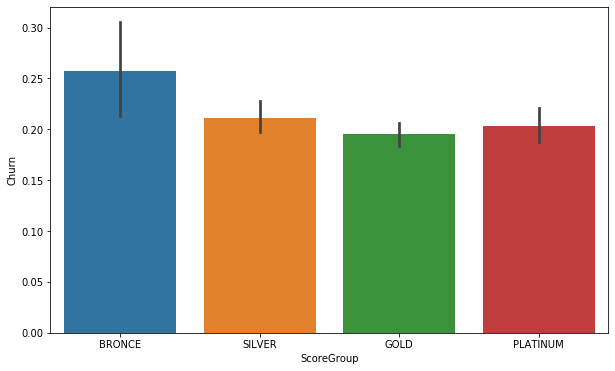

In [31]:
# Plot the distribution score_bin and Churn
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="ScoreGroup", y="Churn", data=dataset)
plt.show()

* * *

#### `CountryLocation`
Categorical variable with location of the customer. 

In [32]:
print("CountryLocation variable has {0} total observations and {1} are unique only".format(dataset['CountryLocation'].count(),dataset['CountryLocation'].nunique()))

CountryLocation variable has 10000 total observations and 3 are unique only


In [33]:
# Check first 10 elements
print(dataset['CountryLocation'].head(10))

0     France
1      Spain
2     France
3     France
4      Spain
5      Spain
6     France
7    Germany
8     France
9     France
Name: CountryLocation, dtype: object


In [34]:
# Check last 10 elements
print(dataset['CountryLocation'].tail(10))

9990    Germany
9991     France
9992      Spain
9993     France
9994     France
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: CountryLocation, dtype: object


In [35]:
# Check unique values
dataset['CountryLocation'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [36]:
# Evaluate CountryLocation  and Churn as absolute values
pd.crosstab(index=dataset["CountryLocation"],
                        columns=dataset["Churn"], margins=True)

Churn,0,1,All
CountryLocation,,,
France,4204,810,5014
Germany,1695,814,2509
Spain,2064,413,2477
All,7963,2037,10000


In [37]:
# Evaluate countryLocation and Churn as relatives values
dataset[["CountryLocation", "Churn"]].groupby(['CountryLocation'], as_index=False, axis=0).mean()

,CountryLocation,Churn
0,France,0.161548
1,Germany,0.324432
2,Spain,0.166734


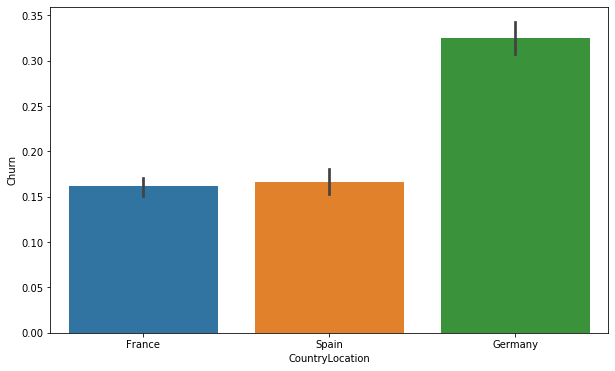

In [38]:
# Plot the distribution CountryLocation and Churn
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="CountryLocation", y="Churn", data=dataset)
plt.show()

> We checked that `Germany` has least 32% churned customer

* * *

#### `Gender`
Customer genre. It's a categorical feature with two values, `male` y `female`. We converted it a dummy or binary value.

In [39]:
print("Gender variable has {0} total observations and {1} are unique only".format(dataset['Gender'].count(),dataset['Gender'].nunique()))

Gender variable has 10000 total observations and 2 are unique only


In [40]:
# Check first 10 elements
print(dataset['Gender'].head(10))

0    Female
1    Female
2    Female
3    Female
4    Female
5      Male
6      Male
7    Female
8      Male
9      Male
Name: Gender, dtype: object


In [41]:
# Check last 10 elements
print(dataset['Gender'].tail(10))

9990      Male
9991    Female
9992      Male
9993      Male
9994    Female
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: Gender, dtype: object


In [42]:
# Evaluate the results Gender and Churn
pd.crosstab(dataset['Gender'], dataset['Churn'])

Churn,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [43]:
# Evaluate Gender and Churn as absolute values
pd.crosstab(index=dataset["Gender"],
                        columns=dataset["Churn"], margins=True)

Churn,0,1,All
Gender,,,
Female,3404,1139,4543
Male,4559,898,5457
All,7963,2037,10000


In [44]:
# Check the churn ratio with gender
dataset[["Gender", "Churn"]].groupby(['Gender'], as_index=False).mean()

,Gender,Churn
0,Female,0.250715
1,Male,0.164559


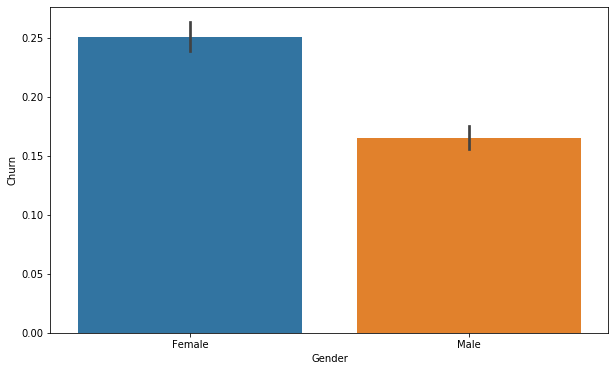

In [45]:
# Plot the frequency
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="Gender", y="Churn", data=dataset)

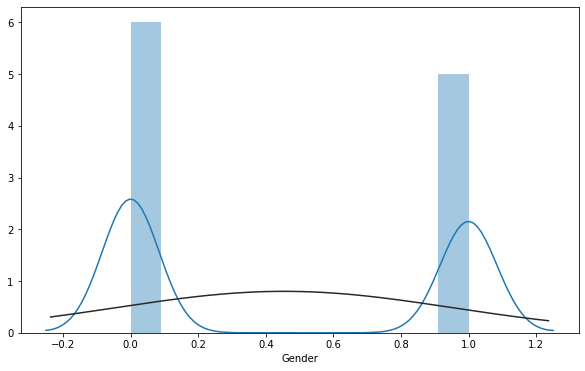

In [46]:
# Plot the distribution
plt.figure(figsize= [10.0, 6.0])
sns.distplot(dataset['Gender'].map( {'Female': 1, 'Male': 0} ).astype(int), fit=norm)

In [47]:
# Check the churn ratio with gender
dataset[["Gender", "Churn"]].groupby(['Gender'], as_index=False).mean()

,Gender,Churn
0,Female,0.250715
1,Male,0.164559


In [48]:
# Convert categorical variable to binary variable where female 1 and male 0
dataset['Gender'] = dataset['Gender'].map( {'Female': 1, 'Male': 0} ).astype(int)

In [49]:
# Show the churn ratio with gender binarized
dataset[["Gender", "Churn"]].groupby(['Gender'], as_index=False).mean()

,Gender,Churn
0,0,0.164559
1,1,0.250715


* * *

#### `Tenure`
Discrete variable indicate number of months the customer has stayed with the company

In [50]:
print("Tenure variable has {0} total observations and {1} are unique only.".format(dataset['Tenure'].count(),dataset['Tenure'].nunique()))

Tenure variable has 10000 total observations and 11 are unique only.


In [51]:
# Check first 10 elements
print(dataset['Tenure'].head(10))

0    2
1    1
2    8
3    1
4    2
5    8
6    7
7    4
8    4
9    2
Name: Tenure, dtype: int64


In [52]:
# Check first 10 elements
print(dataset['Tenure'].tail(10))

9990     3
9991     4
9992     2
9993     7
9994     2
9995     5
9996    10
9997     7
9998     3
9999     4
Name: Tenure, dtype: int64


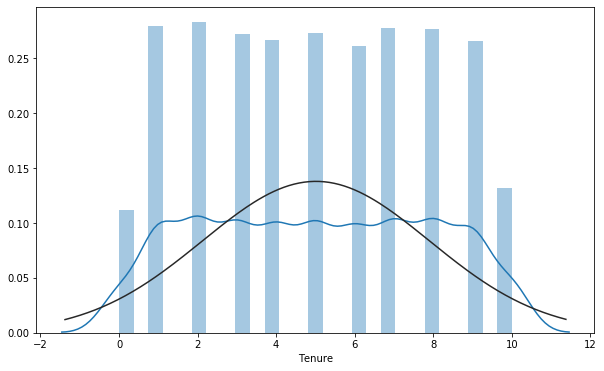

In [53]:
# Plot the distribution
plt.figure(figsize= [10.0, 6.0])
sns.distplot(dataset['Tenure'], fit=norm)

In [54]:
# Evaluate CountryLocation  and Churn as absolute values
pd.crosstab(index=dataset["Tenure"],
                        columns=dataset["Churn"], margins=True)

Churn,0,1,All
Tenure,,,
0,318,95,413
1,803,232,1035
2,847,201,1048
3,796,213,1009
4,786,203,989
5,803,209,1012
6,771,196,967
7,851,177,1028
8,828,197,1025


In [55]:
# Check the survived ratio with sex
dataset[["Tenure", "Churn"]].groupby(['Tenure'], as_index=False).mean()

,Tenure,Churn
0,0,0.230024
1,1,0.224155
2,2,0.191794
3,3,0.211100
4,4,0.205258
5,5,0.206522
6,6,0.202689
7,7,0.172179
8,8,0.192195
9,9,0.216463


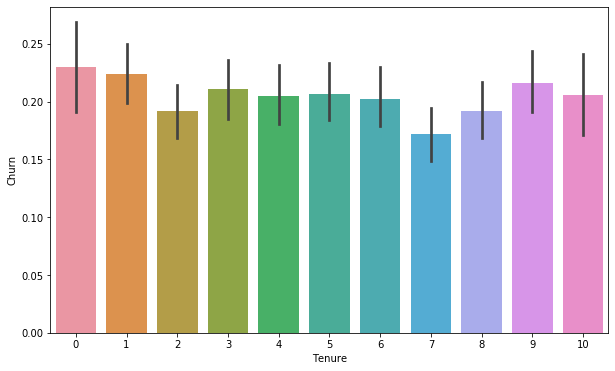

In [56]:
# Plot the distribution AgeGroup and Score
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="Tenure", y="Churn", data=dataset)
plt.show()

* * *

#### `Age`
Numerical variable with age of the customer. We transform in categorical variable and grouped.

In [57]:
print("Age variable has {0} total observations and {1} are unique only.".format(dataset['Age'].count(),dataset['Age'].nunique()))

Age variable has 10000 total observations and 70 are unique only.


In [58]:
# Check first 10 elements
print(dataset['Age'].head(10))

0    42
1    41
2    42
3    39
4    43
5    44
6    50
7    29
8    44
9    27
Name: Age, dtype: int64


In [59]:
# Check last 10 elements
print(dataset['Age'].tail(10))

9990    33
9991    53
9992    36
9993    28
9994    29
9995    39
9996    35
9997    36
9998    42
9999    28
Name: Age, dtype: int64


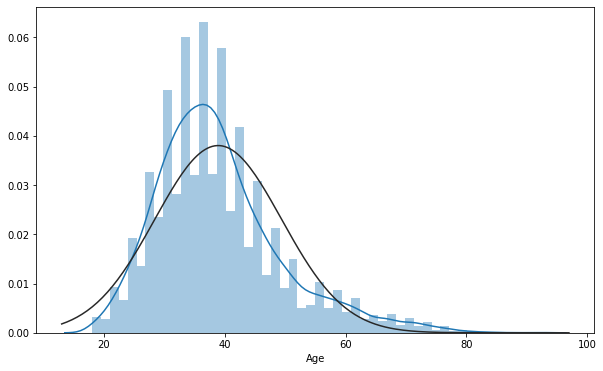

In [60]:
# Plot the distribution
plt.figure(figsize= [10.0, 6.0])
sns.distplot(dataset['Age'], fit=norm)

In [61]:
# Check the results
pd.crosstab(dataset['Age'], dataset['Churn'])

Churn,0,1
Age,,
18,20,2
19,26,1
20,38,2
21,50,3
22,72,12
23,93,6
24,118,14
25,148,6
26,186,14


In [62]:
# Check the churn ratio with age
dataset[["Age", "Churn"]].groupby(['Age'], as_index=False).mean()

,Age,Churn
0,18,0.090909
1,19,0.037037
2,20,0.050000
3,21,0.056604
4,22,0.142857
5,23,0.060606
6,24,0.106061
7,25,0.038961
8,26,0.070000
9,27,0.062201


In [63]:
# grouped in 6 bins
bins = [-np.inf, 24, 35, 44, 54, 64, np.inf]
labels = ['Teenager', 'Student', 'Young Adult', 'Adult', 'Mid-Senior', 'Senior']
dataset['AgeGroup'] = pd.cut(dataset["Age"], bins, labels = labels)

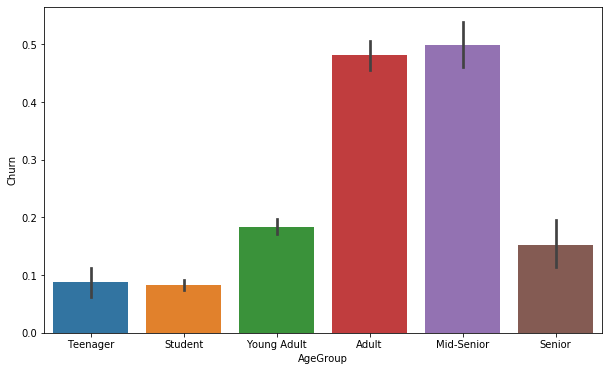

In [64]:
# Plot the distribution AgeGroup and Churn
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="AgeGroup", y="Churn", data=dataset)
plt.show()

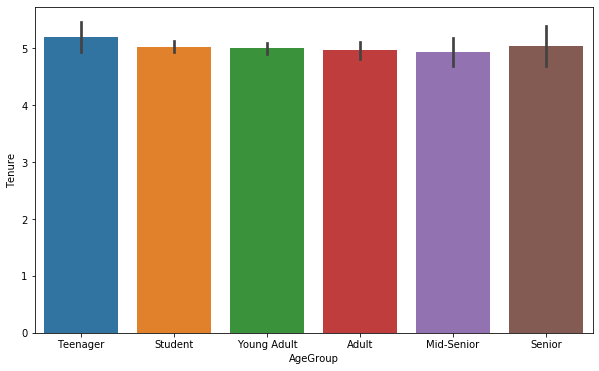

In [65]:
# Plot the distribution AgeGroup and Score
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="AgeGroup", y="Tenure", data=dataset)
plt.show()

In [66]:
# Evaluate CountryLocation  and Churn as absolute values
pd.crosstab(index=dataset["AgeGroup"],
                        columns=dataset["Churn"], margins=True)

Churn,0,1,All
AgeGroup,,,
Teenager,417,40,1458
Student,3389,307,3507
Young Adult,2861,646,457
Adult,756,702,3696
Mid-Senior,301,299,600
Senior,239,43,282
All,7963,2037,10000


In [67]:
# Check the survived age group with churn
dataset[["AgeGroup", "Churn"]].groupby(['AgeGroup'], as_index=False).mean()

,AgeGroup,Churn
0,Teenager,0.087527
1,Student,0.083063
2,Young Adult,0.184203
3,Adult,0.481481
4,Mid-Senior,0.498333
5,Senior,0.152482


* * *

#### `Games Balance`
Continuous variable indicate a balance value for gamer

In [68]:
print("Games Balance variable has {0} total observations and {1} are unique only.".format(dataset['Games Balance'].count(),dataset['Games Balance'].nunique()))

Games Balance variable has 10000 total observations and 6382 are unique only.


In [69]:
# Check first 10 elements
print(dataset['Games Balance'].head(10))

0         0.00
1     83807.86
2    159660.80
3         0.00
4    125510.82
5    113755.78
6         0.00
7    115046.74
8    142051.07
9    134603.88
Name: Games Balance, dtype: float64


In [70]:
# Check last 10 elements
print(dataset['Games Balance'].tail(10))

9990     35016.60
9991     88381.21
9992         0.00
9993    155060.41
9994         0.00
9995         0.00
9996     57369.61
9997         0.00
9998     75075.31
9999    130142.79
Name: Games Balance, dtype: float64


In [71]:
# Check the results
pd.crosstab(dataset['Games Balance'], dataset['Churn'])

Churn,0,1
Games Balance,,
0.00,3117,500
3768.69,0,1
12459.19,0,1
14262.80,1,0
16893.59,1,0
23503.31,0,1
24043.45,0,1
27288.43,1,0
27517.15,1,0


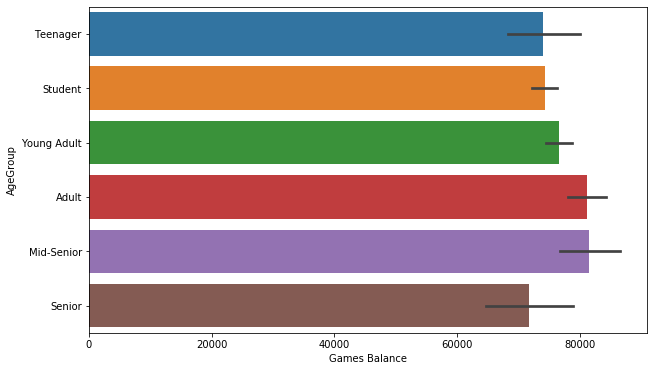

In [72]:
# Plot the distribution AgeGroup and Score
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x='Games Balance', y='AgeGroup' ,data=dataset)
plt.show()

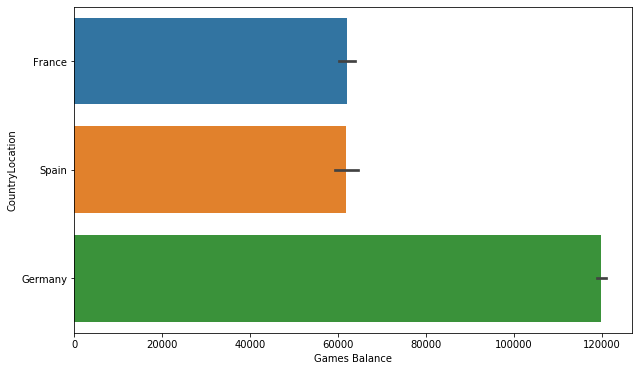

In [73]:
# Plot the distribution AgeGroup and Score
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x='Games Balance', y='CountryLocation' ,data=dataset)
plt.show()

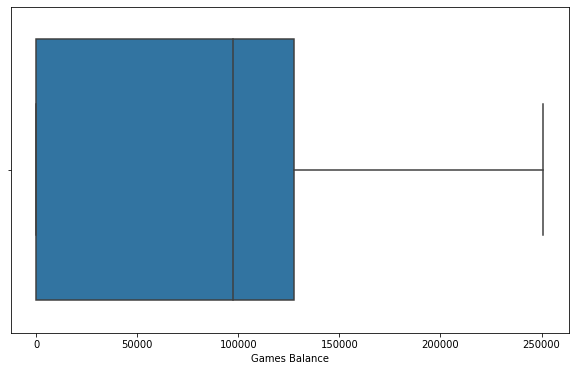

In [74]:
# Plot the distribution AgeGroup and Score
plt.figure(figsize= [10.0, 6.0])
sns.boxplot(x='Games Balance', data=dataset)
plt.show()

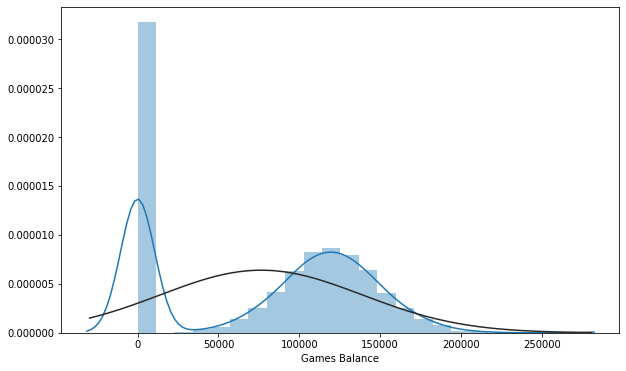

In [75]:
# Plot the distribution
plt.figure(figsize= [10.0, 6.0])
sns.distplot(dataset['Games Balance'], fit=norm)

In [76]:
# We decide to bin that variable, first check basic stats
dataset['Games Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Games Balance, dtype: float64

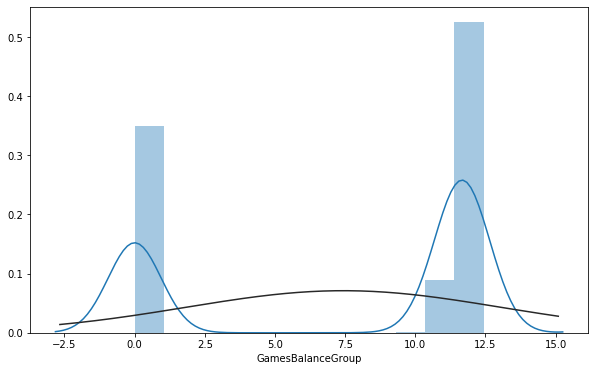

In [77]:
# Normalize the data of Games Balance
plt.figure(figsize= [10.0, 6.0])
dataset['GamesBalanceGroup'] = np.log1p(dataset['Games Balance'])
sns.distplot(dataset['GamesBalanceGroup'], fit=norm)

In [78]:
dataset['GamesBalanceGroup'].describe()

count    10000.000000
mean         7.441327
std          5.606400
min          0.000000
25%          0.000000
50%         11.484521
75%         11.757010
max         12.432806
Name: GamesBalanceGroup, dtype: float64

In [79]:
# We check the best interval to separate and normalize values

## try with 4
pd.cut(dataset['Games Balance'], bins=4).value_counts()

(-250.898, 62724.522]       3813
(62724.522, 125449.045]     3493
(125449.045, 188173.568]    2612
(188173.568, 250898.09]       82
Name: Games Balance, dtype: int64

In [80]:
## try with 6
pd.cut(dataset['Games Balance'], bins=6).value_counts()

(-250.898, 41816.348]       3655
(83632.697, 125449.045]     2953
(125449.045, 167265.393]    2309
(41816.348, 83632.697]       698
(167265.393, 209081.742]     370
(209081.742, 250898.09]       15
Name: Games Balance, dtype: int64

In [81]:
## try with 10
pd.cut(dataset['Games Balance'], bins=10).value_counts()

(-250.898, 25089.809]       3623
(100359.236, 125449.045]    2081
(125449.045, 150538.854]    1747
(75269.427, 100359.236]     1173
(150538.854, 175628.663]     729
(50179.618, 75269.427]       360
(175628.663, 200718.472]     186
(25089.809, 50179.618]        69
(200718.472, 225808.281]      30
(225808.281, 250898.09]        2
Name: Games Balance, dtype: int64

In [82]:
# In first instance we try only 4 bins and labeled´them
dataset['GamesBalanceGroup'] = pd.cut(dataset['Games Balance'], 4, labels=['LOW', 'MEDIUM', 'INTERMEDIATE', 'HIGH'])

In [83]:
# Evaluate games balance and Churn as absolute values
pd.crosstab(index=dataset["GamesBalanceGroup"],
                        columns=dataset["Churn"], margins=True)

Churn,0,1,All
GamesBalanceGroup,,,
LOW,3262,551,3813
MEDIUM,2653,840,3493
INTERMEDIATE,1998,614,2612
HIGH,50,32,82
All,7963,2037,10000


In [84]:
# Check the labeled games balanced with churn
dataset[["GamesBalanceGroup", "Churn"]].groupby(['GamesBalanceGroup'], as_index=False).mean()

,GamesBalanceGroup,Churn
0,LOW,0.144506
1,MEDIUM,0.240481
2,INTERMEDIATE,0.235069
3,HIGH,0.390244


* * *

#### `NumOfProducts`
Discrete variable indicate number of months the customer has stayed with the company

In [85]:
print("NumOfProducts variable has {0} total observations and {1} are unique only.".format(dataset['NumOfProducts'].count(),dataset['NumOfProducts'].nunique()))

NumOfProducts variable has 10000 total observations and 4 are unique only.


In [86]:
# Check first 10 elements
print(dataset['NumOfProducts'].head(10))

0    1
1    1
2    3
3    2
4    1
5    2
6    2
7    4
8    2
9    1
Name: NumOfProducts, dtype: int64


In [87]:
# Check last 10 elements
print(dataset['NumOfProducts'].tail(10))

9990    1
9991    1
9992    1
9993    1
9994    2
9995    2
9996    1
9997    1
9998    2
9999    1
Name: NumOfProducts, dtype: int64


In [88]:
# Evaluate games balance and Churn as absolute values
pd.crosstab(index=dataset["NumOfProducts"],
                        columns=dataset["Churn"], margins=True)

Churn,0,1,All
NumOfProducts,,,
1,3675,1409,5084
2,4242,348,4590
3,46,220,266
4,0,60,60
All,7963,2037,10000


In [89]:
# Check the customer with Num of products and churned
dataset[["NumOfProducts", "Churn"]].groupby(['NumOfProducts'], as_index=False).mean()

,NumOfProducts,Churn
0,1,0.277144
1,2,0.075817
2,3,0.827068
3,4,1.000000


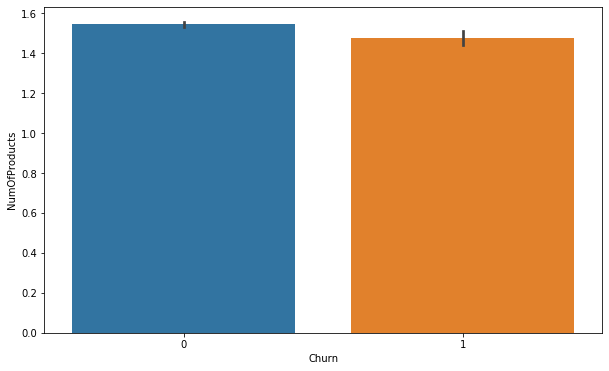

In [90]:
# Plot the distribution Num of Products and Churn
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x='Churn', y='NumOfProducts', data=dataset)
plt.show()

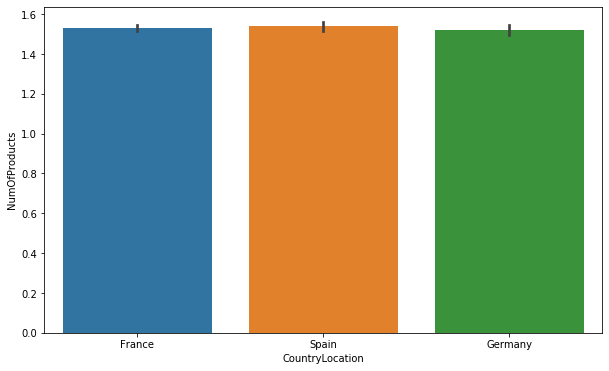

In [91]:
# Plot the distribution CountryLocation and NumOfProducts
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x='CountryLocation', y='NumOfProducts' ,data=dataset)
plt.show()

* * *

#### `HasPremiumAccess`
Binary variable indicate `0` not have premium access and `1` yes have.

In [92]:
print("HasPremiumAccess variable has {0} total observations and {1} are unique only.".format(dataset['HasPremiumAccess'].count(),dataset['HasPremiumAccess'].nunique()))

HasPremiumAccess variable has 10000 total observations and 2 are unique only.


In [93]:
# Check first 10 elements
print(dataset['HasPremiumAccess'].head(10))

0    1
1    0
2    1
3    0
4    1
5    1
6    1
7    1
8    0
9    1
Name: HasPremiumAccess, dtype: int64


In [94]:
# Check last 10 elements
print(dataset['HasPremiumAccess'].tail(10))

9990    1
9991    1
9992    1
9993    1
9994    0
9995    1
9996    1
9997    0
9998    1
9999    1
Name: HasPremiumAccess, dtype: int64


In [95]:
# Check the results
pd.crosstab(dataset['HasPremiumAccess'], dataset['Churn'],
           margins=True)

Churn,0,1,All
HasPremiumAccess,,,
0,2332,613,2945
1,5631,1424,7055
All,7963,2037,10000


In [96]:
# Check the results
pd.crosstab(dataset['HasPremiumAccess'], dataset['Churn'], margins=True).apply(lambda r: r/r.sum(), axis=0)

Churn,0,1,All
HasPremiumAccess,,,
0,0.146427,0.150466,0.14725
1,0.353573,0.349534,0.35275
All,0.500000,0.500000,0.50000


In [97]:
# Other alternative
dataset.pivot_table(index='HasPremiumAccess', columns='Churn', aggfunc={'Churn':len}, fill_value=0)

Churn      
Churn                0     1
HasPremiumAccess            
0                 2332   613
1                 5631  1424

In [98]:
# Check the customer has premium access and churn rate
dataset[["HasPremiumAccess", "Churn"]].groupby(['Churn'], as_index=False).mean()

,Churn,HasPremiumAccess
0,0,0.707146
1,1,0.699067


In [99]:
pd.crosstab(dataset['HasPremiumAccess'],dataset['CountryLocation'])

CountryLocation,France,Germany,Spain
HasPremiumAccess,,,
0,1471,718,756
1,3543,1791,1721


In [100]:
pd.crosstab(dataset['HasPremiumAccess'],dataset['Churn'])

Churn,0,1
HasPremiumAccess,,
0,2332,613
1,5631,1424


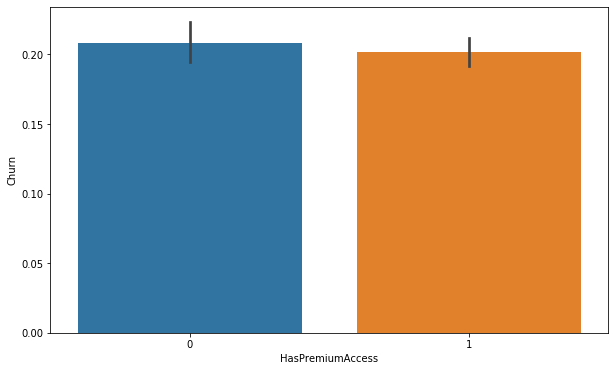

In [101]:
# Plot the distribution HasPremiumAccess and Churn
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x='HasPremiumAccess', y='Churn', data=dataset)
plt.show()

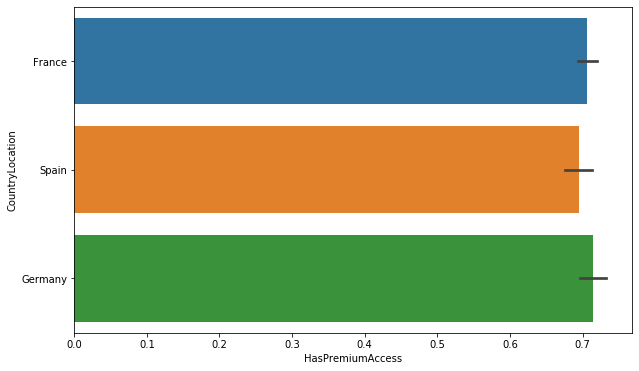

In [102]:
# Plot the distribution AgeGroup and Score
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x='HasPremiumAccess', y='CountryLocation' ,data=dataset)
plt.show()

* * *

#### `IsActiveMember`
Binary variable indicate `0` customer not active member and `1` yes he is.

In [103]:
print("IsActiveMember variable has {0} total observations and {1} are unique only.".format(dataset['IsActiveMember'].count(),dataset['IsActiveMember'].nunique()))

IsActiveMember variable has 10000 total observations and 2 are unique only.


In [104]:
# Check first 10 elements
print(dataset['IsActiveMember'].head(10))

0    1
1    1
2    0
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: IsActiveMember, dtype: int64


In [105]:
# Check last 10 elements
print(dataset['IsActiveMember'].tail(10))

9990    0
9991    0
9992    0
9993    0
9994    0
9995    0
9996    1
9997    1
9998    0
9999    0
Name: IsActiveMember, dtype: int64


In [106]:
# Check the results
pd.crosstab(dataset['IsActiveMember'], dataset['Churn'],
           margins=True)

Churn,0,1,All
IsActiveMember,,,
0,3547,1302,4849
1,4416,735,5151
All,7963,2037,10000


In [107]:
# Check the customer IsActiveMember and churn rate
dataset[["IsActiveMember", "Churn"]].groupby(['IsActiveMember'], as_index=False).mean()

,IsActiveMember,Churn
0,0,0.268509
1,1,0.142691


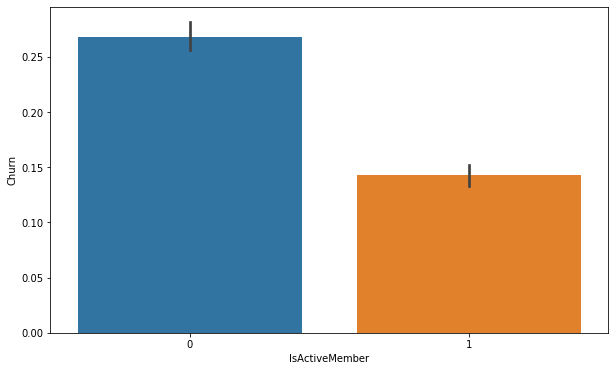

In [108]:
# Plot the distribution HasPremiumAccess and Churn
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x='IsActiveMember', y='Churn' ,data=dataset)
plt.show()

* * *

#### `Cumulative score`
Binary variable indicate `0` customer not active member and `1` yes he is.

In [109]:
print("Cumulative score variable has {0} total observations and {1} are unique only.".format(dataset['Cumulative score'].count(),dataset['Cumulative score'].nunique()))

Cumulative score variable has 10000 total observations and 9999 are unique only.


In [110]:
# Check first 10 elements
print(dataset['Cumulative score'].head(10))

0    101348.88
1    112542.58
2    113931.57
3     93826.63
4     79084.10
5    149756.71
6     10062.80
7    119346.88
8     74940.50
9     71725.73
Name: Cumulative score, dtype: float64


In [111]:
# Check last 10 elements
print(dataset['Cumulative score'].tail(10))

9990     53667.08
9991     69384.71
9992    195192.40
9993     29179.52
9994    167773.55
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: Cumulative score, dtype: float64


In [112]:
# Check the results
pd.crosstab(dataset['Cumulative score'], dataset['Churn'])

Churn,0,1
Cumulative score,,
11.58,0,1
90.07,1,0
91.75,0,1
96.27,1,0
106.67,1,0
123.07,0,1
142.81,1,0
143.34,1,0
178.19,1,0


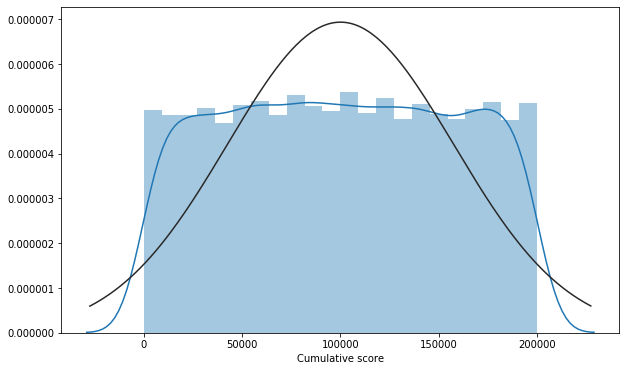

In [113]:
# Plot the distribution
plt.figure(figsize= [10.0, 6.0])
sns.distplot(dataset['Cumulative score'], fit=norm)

In [114]:
# We decide to bin that variable, first check basic stats
dataset['Cumulative score'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: Cumulative score, dtype: float64

In [115]:
# We can choose for equal intervals, example 4 bins
pd.qcut(dataset['Cumulative score'], q=4)

0       (100193.915, 149388.248]
1       (100193.915, 149388.248]
2       (100193.915, 149388.248]
3         (51002.11, 100193.915]
4         (51002.11, 100193.915]
5        (149388.248, 199992.48]
6             (11.579, 51002.11]
7       (100193.915, 149388.248]
8         (51002.11, 100193.915]
9         (51002.11, 100193.915]
10        (51002.11, 100193.915]
11        (51002.11, 100193.915]
12            (11.579, 51002.11]
13       (149388.248, 199992.48]
14        (51002.11, 100193.915]
15        (51002.11, 100193.915]
16            (11.579, 51002.11]
17            (11.579, 51002.11]
18       (149388.248, 199992.48]
19        (51002.11, 100193.915]
20       (149388.248, 199992.48]
21      (100193.915, 149388.248]
22      (100193.915, 149388.248]
23            (11.579, 51002.11]
24       (149388.248, 199992.48]
25      (100193.915, 149388.248]
26       (149388.248, 199992.48]
27            (11.579, 51002.11]
28        (51002.11, 100193.915]
29        (51002.11, 100193.915]
          

In [116]:
# We can choose for equal intervals, example 6 bins
pd.qcut(dataset['Cumulative score'], q=6)

0       (100193.915, 132801.57]
1       (100193.915, 132801.57]
2       (100193.915, 132801.57]
3        (67057.27, 100193.915]
4        (67057.27, 100193.915]
5        (132801.57, 166912.72]
6           (11.579, 34025.025]
7       (100193.915, 132801.57]
8        (67057.27, 100193.915]
9        (67057.27, 100193.915]
10       (67057.27, 100193.915]
11       (67057.27, 100193.915]
12          (11.579, 34025.025]
13       (166912.72, 199992.48]
14        (34025.025, 67057.27]
15        (34025.025, 67057.27]
16          (11.579, 34025.025]
17          (11.579, 34025.025]
18       (132801.57, 166912.72]
19        (34025.025, 67057.27]
20       (166912.72, 199992.48]
21       (132801.57, 166912.72]
22      (100193.915, 132801.57]
23          (11.579, 34025.025]
24       (166912.72, 199992.48]
25      (100193.915, 132801.57]
26       (166912.72, 199992.48]
27        (34025.025, 67057.27]
28       (67057.27, 100193.915]
29        (34025.025, 67057.27]
                 ...           
9970    

In [117]:
pd.cut(dataset['Cumulative score'], bins=6).value_counts()

(100002.03, 133332.18]    1707
(166662.33, 199992.48]    1681
(33341.73, 66671.88]      1680
(66671.88, 100002.03]     1676
(-188.401, 33341.73]      1634
(133332.18, 166662.33]    1622
Name: Cumulative score, dtype: int64

In [118]:
# In first instance we try only 8 bins and labeled´them
dataset['CumScoreGroup'] = pd.qcut(dataset['Cumulative score'], 8, labels=['Entry-Level', 'Rookie', 'Novice', 'Intermediate', 'Expert', 'Master', 'GrandMaster', 'Commodoro'])

In [119]:
# Check the results
pd.crosstab(dataset['CumScoreGroup'], dataset['Churn'],
           margins=True)

Churn,0,1,All
CumScoreGroup,,,
Entry-Level,1003,247,1250
Rookie,997,253,1250
Novice,989,261,1250
Intermediate,1016,234,1250
Expert,998,252,1250
Master,999,251,1250
GrandMaster,981,269,1250
Commodoro,980,270,1250
All,7963,2037,10000


In [120]:
# Check the customer has premium access and churn rate
dataset[["CumScoreGroup", "Churn"]].groupby(['CumScoreGroup'], as_index=False).mean()

,CumScoreGroup,Churn
0,Entry-Level,0.1976
1,Rookie,0.2024
2,Novice,0.2088
3,Intermediate,0.1872
4,Expert,0.2016
5,Master,0.2008
6,GrandMaster,0.2152
7,Commodoro,0.2160


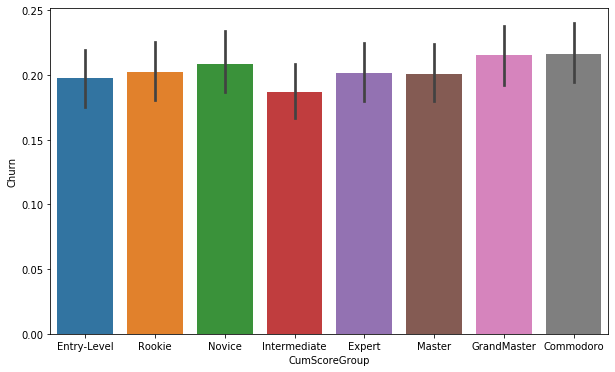

In [121]:
# Plot the distribution HasPremiumAccess and Churn
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x='CumScoreGroup', y='Churn' ,data=dataset)
plt.show()

* * *

#### `Churn`
Binary variable indicate `0` customer not churned and `1` yes he is.

In [122]:
# Check first 10 elements
print(dataset['Churn'].head(10))

0    1
1    0
2    1
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: Churn, dtype: int64


In [123]:
# Check last 10 elements
print(dataset['Churn'].tail(10))

9990    0
9991    1
9992    0
9993    0
9994    0
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Churn, dtype: int64


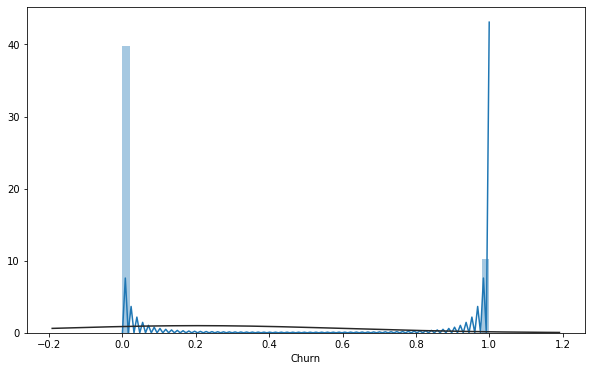

In [124]:
# Plot the distribution
plt.figure(figsize= [10.0, 6.0])
sns.distplot(dataset['Churn'], fit=norm)

In [125]:
# Check unique values again
print ("\nUnique values :  \n",dataset['Churn'].nunique())


Unique values :  
 2


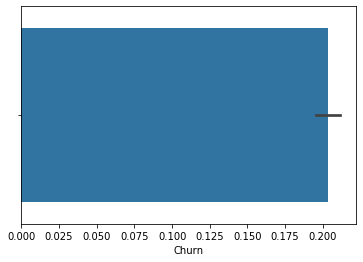

In [126]:
sns.barplot(x="Churn", data=dataset)

In [127]:
# Check the results
values_churn = dataset['Churn'].value_counts()
print("There are {0} customer churned and {1} aren't".format(values_churn[0], values_churn[1]))

There are 7963 customer churned and 2037 aren't


In [128]:
# Check the customer has premium access and churn rate
dataset["Churn"].mean()

0.2037

# First conclusion

After checked with the EDA - Exploratory Data Analysis, we have first most important insights to show:

- The dataset is a sample with `10k` values, we haven't null values
- In this first instance we be able to prepare and manipulate dataset for to make a good model, maybe they are few data to receive a good `accuracy score` 
- There are `7963` customers are churned and 2037 aren't. That is a 79%.
- Customer come from three main countries, one of them has high churn rate, `Germany` with almost 32%
- For age's group we have high churn rate from two profiles: `Mid-Senior`:49,8% and `Adult`: 48,1%
- The 14% churned customer was an `active member`, but 27% wasn't.
- The 70% churned customer was a `Premium access`

### Manipulate the dataset

After the first visualization, we can decide to normalize, discretize and binarize the categorical variable, and numerical variable.

In [129]:
# Check the colunmns
dataset.columns

Index(['idClient', 'Score', 'CountryLocation', 'Gender', 'Age', 'Tenure',
       'Games Balance', 'NumOfProducts', 'HasPremiumAccess', 'IsActiveMember',
       'Cumulative score', 'Churn', 'score_norm', 'ScoreGroup', 'AgeGroup',
       'GamesBalanceGroup', 'CumScoreGroup'],
      dtype='object')

In [130]:
# After to observe the features, we choose to rescale: Score, Tenure, Games Balance and Cumulative score
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
idClient             10000 non-null int64
Score                10000 non-null int64
CountryLocation      10000 non-null object
Gender               10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null int64
Games Balance        10000 non-null float64
NumOfProducts        10000 non-null int64
HasPremiumAccess     10000 non-null int64
IsActiveMember       10000 non-null int64
Cumulative score     10000 non-null float64
Churn                10000 non-null int64
score_norm           10000 non-null float64
ScoreGroup           10000 non-null category
AgeGroup             10000 non-null category
GamesBalanceGroup    10000 non-null category
CumScoreGroup        10000 non-null category
dtypes: category(4), float64(3), int64(9), object(1)
memory usage: 1.0+ MB


In [131]:
# Data Normalization
normalized_X = preprocessing.normalize(dataset[['Score', 'Games Balance', 'NumOfProducts', 'Cumulative score']])
normalized_X

array([[6.10750168e-03, 0.00000000e+00, 9.86672323e-06, 9.99981349e-01],
       [4.33292497e-03, 5.97258503e-01, 7.12652134e-06, 8.02037098e-01],
       [2.55935224e-03, 8.14000450e-01, 1.52949337e-05, 5.80858603e-01],
       ...,
       [1.68442353e-02, 0.00000000e+00, 2.37577366e-05, 9.99858126e-01],
       [6.46366357e-03, 6.28577133e-01, 1.67452424e-05, 7.77720393e-01],
       [5.83928721e-03, 9.59521628e-01, 7.37283739e-06, 2.81574411e-01]])

In [132]:
# Data Standardization
standarization_X = preprocessing.scale(dataset[['Score', 'Games Balance', 'Cumulative score']])
standarization_X

array([[-0.32622142, -1.22584767,  0.02188649],
       [-0.44003595,  0.11735002,  0.21653375],
       [-1.53679418,  1.33305335,  0.2406869 ],
       ...,
       [ 0.60498839, -1.22584767, -1.00864308],
       [ 1.25683526, -0.02260751, -0.12523071],
       [ 1.46377078,  0.85996499, -1.07636976]])

In [133]:
categories_to_standarize = ['Score', 'Games Balance', 'Cumulative score']
for stand in categories_to_standarize:
  preprocessing.scale(dataset[stand], axis=0, 
                      with_mean=True, 
                      with_std=True)

In [134]:
dataset.head(10)

,idClient,Score,CountryLocation,Gender,Age,Tenure,Games Balance,NumOfProducts,HasPremiumAccess,IsActiveMember,Cumulative score,Churn,score_norm,ScoreGroup,AgeGroup,GamesBalanceGroup,CumScoreGroup
0,1,619,France,1,42,2,0.00,1,1,1,101348.88,1,6.429719,GOLD,Young Adult,LOW,Expert
1,2,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,6.411818,GOLD,Young Adult,MEDIUM,Expert
2,3,502,France,1,42,8,159660.80,3,1,0,113931.57,1,6.220590,SILVER,Young Adult,INTERMEDIATE,Expert
3,4,699,France,1,39,1,0.00,2,0,0,93826.63,0,6.551080,GOLD,Young Adult,LOW,Intermediate
4,5,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,6.746412,PLATINUM,Young Adult,INTERMEDIATE,Intermediate
5,6,645,Spain,0,44,8,113755.78,2,1,0,149756.71,1,6.470800,GOLD,Young Adult,MEDIUM,GrandMaster
6,7,822,France,0,50,7,0.00,2,1,1,10062.80,0,6.712956,PLATINUM,Adult,LOW,Entry-Level
7,8,376,Germany,1,29,4,115046.74,4,1,0,119346.88,1,5.932245,BRONCE,Student,MEDIUM,Expert
8,9,501,France,0,44,4,142051.07,2,0,1,74940.50,0,6.218600,SILVER,Young Adult,INTERMEDIATE,Novice
9,10,684,France,0,27,2,134603.88,1,1,1,71725.73,0,6.529419,GOLD,Student,INTERMEDIATE,Novice


## Data Visualization

We show trends and insights by graphs

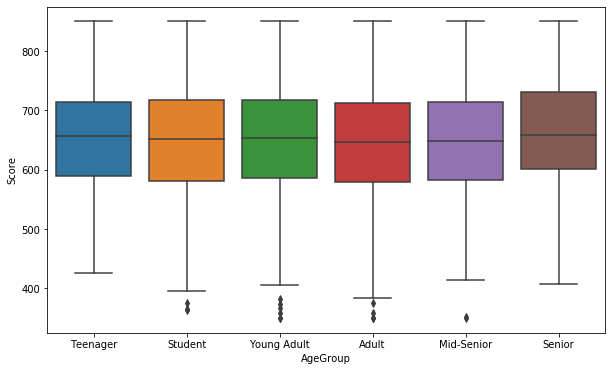

In [135]:
plt.figure(figsize=(10,6))
sns.boxplot(x='AgeGroup', y='Score', data=dataset)
plt.show()

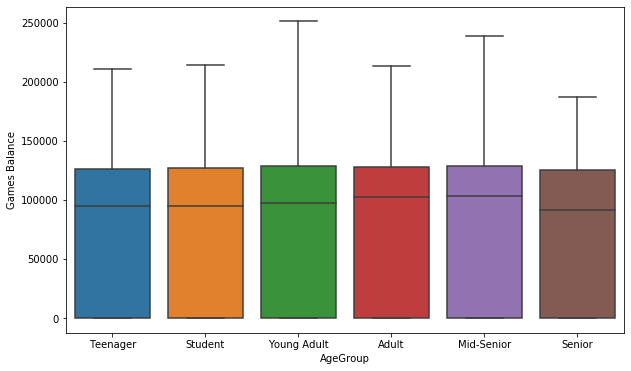

In [136]:
plt.figure(figsize=(10,6))
sns.boxplot(x='AgeGroup', y='Games Balance', data=dataset)
plt.show()

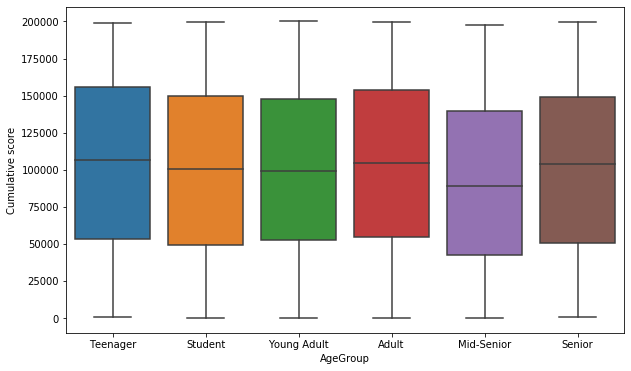

In [137]:
plt.figure(figsize=(10,6))
sns.boxplot(x='AgeGroup', y='Cumulative score', data=dataset)
plt.show()

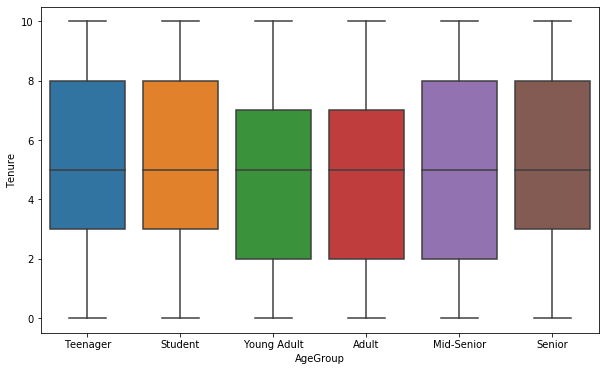

In [138]:
plt.figure(figsize=(10,6))
sns.boxplot(x='AgeGroup', y='Tenure', data=dataset)
plt.show()

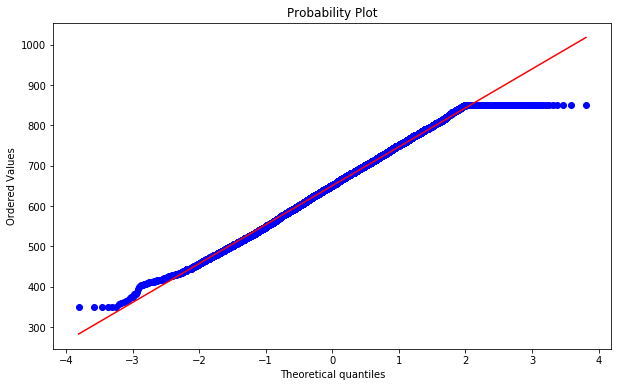

In [139]:
plt.figure(figsize=(10,6))
stats.probplot(dataset['Score'], plot=plt)
plt.show()

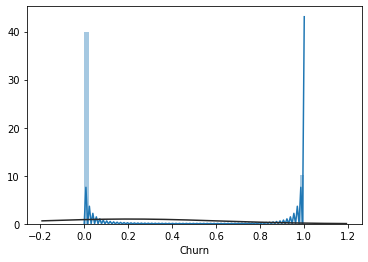

In [140]:
sns.distplot(dataset['Churn'], fit=norm)

## Variable correlation

- What is Correlation?
- Test Dataset
- Covariance
- Pearson’s Correlation
- Spearman’s Correlation

Si visualizamos la matriz de correlación entre las variables, vemos que las mas correlacionadas con la que queremos predecir son `Sex`, `Pclass` i `isAlone`.

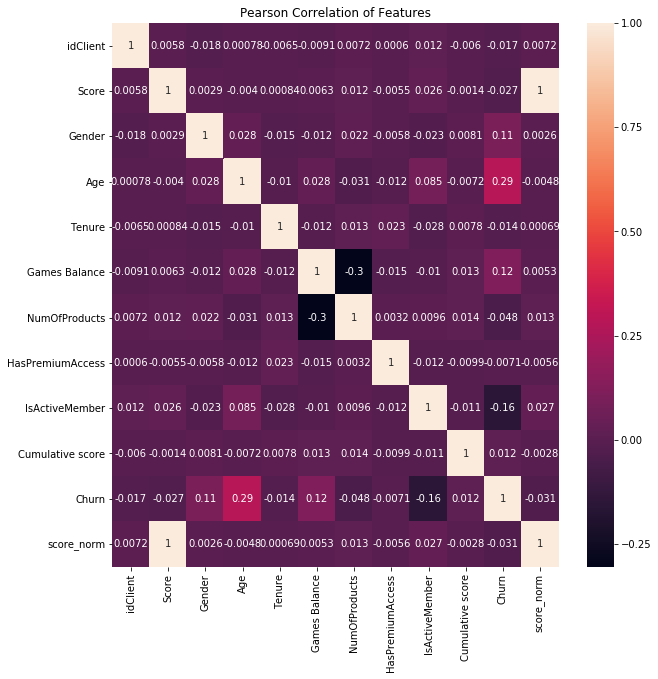

In [141]:
correlation_matrix = dataset.corr()
correlation_matrix

plt.figure(figsize=(10.0,10.0))
plt.title('Pearson Correlation of Features')
sns.heatmap(correlation_matrix, annot=True)

> Most correlate variable are : Age, Games Balance, Gender, and with low significance are IsActiveMember. We try to apply another test to significance.

## Binarizing categorical variables

We binarize categorical variables, where `m` are binary variable.

In [142]:
# Create a dataset backup
dataset_bak = dataset

In [143]:
dataset.dtypes

idClient                int64
Score                   int64
CountryLocation        object
Gender                  int64
Age                     int64
Tenure                  int64
Games Balance         float64
NumOfProducts           int64
HasPremiumAccess        int64
IsActiveMember          int64
Cumulative score      float64
Churn                   int64
score_norm            float64
ScoreGroup           category
AgeGroup             category
GamesBalanceGroup    category
CumScoreGroup        category
dtype: object

In [144]:
# We convert Categorical to boolean
categorical_feature = (dataset.dtypes == object)

# filter categorical columns
categorical_cols = dataset.columns[categorical_feature].tolist()

In [145]:
# Binarize categorical values
dataset = pd.get_dummies(dataset, columns=categorical_cols)

In [146]:
dataset.head(10)

,idClient,Score,Gender,Age,Tenure,Games Balance,NumOfProducts,HasPremiumAccess,IsActiveMember,Cumulative score,Churn,score_norm,ScoreGroup,AgeGroup,GamesBalanceGroup,CumScoreGroup,CountryLocation_France,CountryLocation_Germany,CountryLocation_Spain
0,1,619,1,42,2,0.00,1,1,1,101348.88,1,6.429719,GOLD,Young Adult,LOW,Expert,1,0,0
1,2,608,1,41,1,83807.86,1,0,1,112542.58,0,6.411818,GOLD,Young Adult,MEDIUM,Expert,0,0,1
2,3,502,1,42,8,159660.80,3,1,0,113931.57,1,6.220590,SILVER,Young Adult,INTERMEDIATE,Expert,1,0,0
3,4,699,1,39,1,0.00,2,0,0,93826.63,0,6.551080,GOLD,Young Adult,LOW,Intermediate,1,0,0
4,5,850,1,43,2,125510.82,1,1,1,79084.10,0,6.746412,PLATINUM,Young Adult,INTERMEDIATE,Intermediate,0,0,1
5,6,645,0,44,8,113755.78,2,1,0,149756.71,1,6.470800,GOLD,Young Adult,MEDIUM,GrandMaster,0,0,1
6,7,822,0,50,7,0.00,2,1,1,10062.80,0,6.712956,PLATINUM,Adult,LOW,Entry-Level,1,0,0
7,8,376,1,29,4,115046.74,4,1,0,119346.88,1,5.932245,BRONCE,Student,MEDIUM,Expert,0,1,0
8,9,501,0,44,4,142051.07,2,0,1,74940.50,0,6.218600,SILVER,Young Adult,INTERMEDIATE,Novice,1,0,0
9,10,684,0,27,2,134603.88,1,1,1,71725.73,0,6.529419,GOLD,Student,INTERMEDIATE,Novice,1,0,0


In [147]:
# The procedure is very simple, binarizing categorical variable for training dataset
cols = ['ScoreGroup', 'NumOfProducts', 'Tenure', 'AgeGroup', 'GamesBalanceGroup', 'CumScoreGroup']
churn_categorical = dataset[cols]
churn_categorical = pd.concat([pd.get_dummies(churn_categorical[col], prefix=col) for col in churn_categorical], axis=1)
churn_categorical.head()


,ScoreGroup_BRONCE,ScoreGroup_SILVER,ScoreGroup_GOLD,ScoreGroup_PLATINUM,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,...,GamesBalanceGroup_INTERMEDIATE,GamesBalanceGroup_HIGH,CumScoreGroup_Entry-Level,CumScoreGroup_Rookie,CumScoreGroup_Novice,CumScoreGroup_Intermediate,CumScoreGroup_Expert,CumScoreGroup_Master,CumScoreGroup_GrandMaster,CumScoreGroup_Commodoro
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [148]:
train_churn = pd.concat([dataset[dataset.columns[~dataset.columns.isin(cols)]], churn_categorical], axis=1)
train_churn.head()

,idClient,Score,Gender,Age,Games Balance,HasPremiumAccess,IsActiveMember,Cumulative score,Churn,score_norm,...,GamesBalanceGroup_INTERMEDIATE,GamesBalanceGroup_HIGH,CumScoreGroup_Entry-Level,CumScoreGroup_Rookie,CumScoreGroup_Novice,CumScoreGroup_Intermediate,CumScoreGroup_Expert,CumScoreGroup_Master,CumScoreGroup_GrandMaster,CumScoreGroup_Commodoro
0,1,619,1,42,0.00,1,1,101348.88,1,6.429719,...,0,0,0,0,0,0,1,0,0,0
1,2,608,1,41,83807.86,0,1,112542.58,0,6.411818,...,0,0,0,0,0,0,1,0,0,0
2,3,502,1,42,159660.80,1,0,113931.57,1,6.220590,...,1,0,0,0,0,0,1,0,0,0
3,4,699,1,39,0.00,0,0,93826.63,0,6.551080,...,0,0,0,0,0,1,0,0,0,0
4,5,850,1,43,125510.82,1,1,79084.10,0,6.746412,...,1,0,0,0,0,1,0,0,0,0


In [149]:
train_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
idClient                          10000 non-null int64
Score                             10000 non-null int64
Gender                            10000 non-null int64
Age                               10000 non-null int64
Games Balance                     10000 non-null float64
HasPremiumAccess                  10000 non-null int64
IsActiveMember                    10000 non-null int64
Cumulative score                  10000 non-null float64
Churn                             10000 non-null int64
score_norm                        10000 non-null float64
CountryLocation_France            10000 non-null uint8
CountryLocation_Germany           10000 non-null uint8
CountryLocation_Spain             10000 non-null uint8
ScoreGroup_BRONCE                 10000 non-null uint8
ScoreGroup_SILVER                 10000 non-null uint8
ScoreGroup_GOLD                   10000 non-null uint8
ScoreG

### First part of select of most important features.

In this part we select some features for our model. Anyway, we need more time to check feature one by one, create new one, and examine again the model with change, without changes, with new features and don't.

In [150]:
# FIRST Modeling with only high correlation feature 
## Drop and combine these features to use Grouped 
train_churn.drop(['Age'], axis=1, inplace=True)
train_churn.drop(['Score'], axis=1, inplace=True)
train_churn.drop(['Games Balance'], axis=1, inplace=True)
train_churn.drop(['Cumulative score'], axis=1, inplace=True)

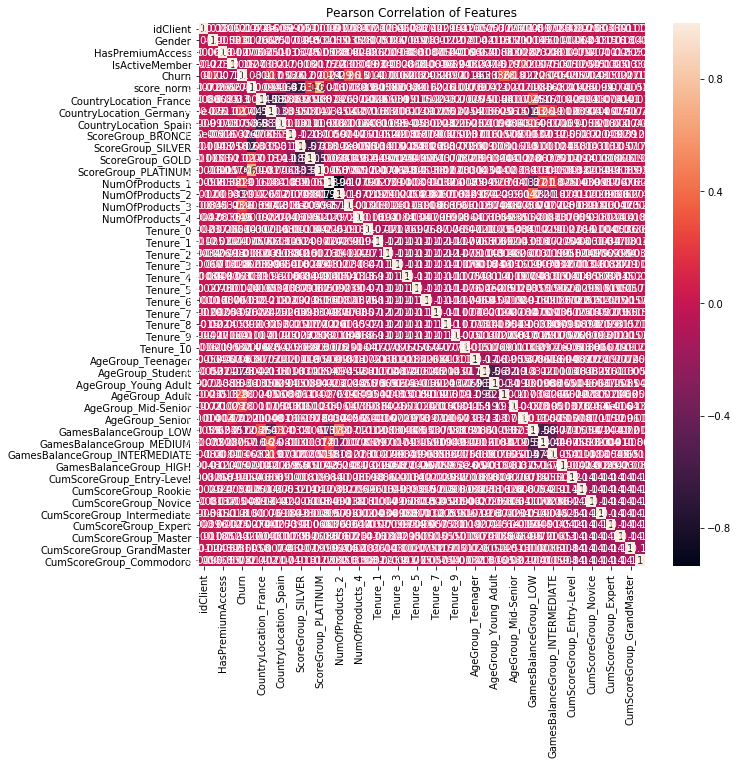

In [151]:
# New correlation matrix
correlation_matrix = train_churn.corr()
correlation_matrix

plt.figure(figsize=(10.0,10.0))
plt.title('Pearson Correlation of Features')
sns.heatmap(correlation_matrix, annot=True)

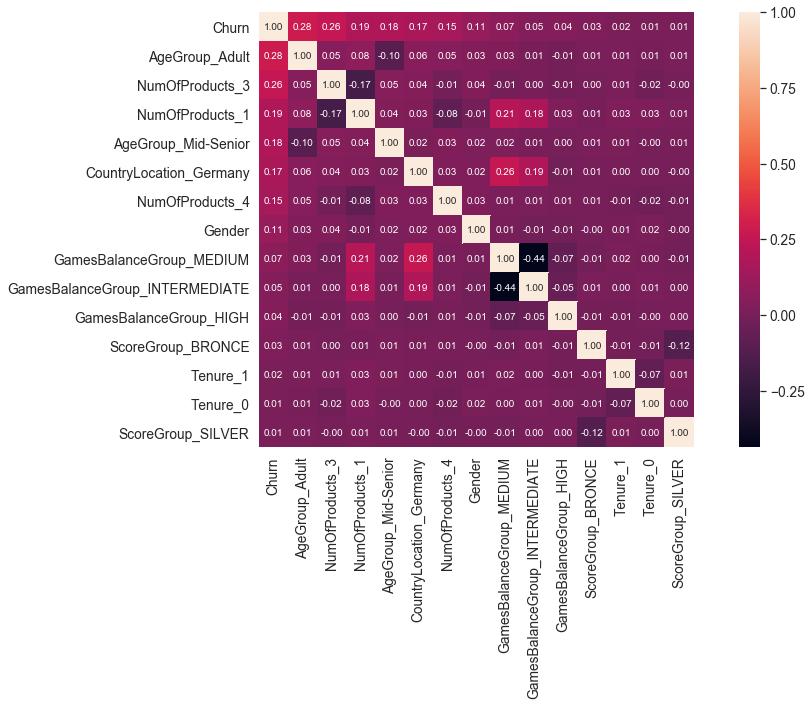

In [152]:
#churn correlation matrix
k = 15 #number of variables for heatmap
plt.figure(figsize=(16,8))
corrmat = train_churn.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'Churn')['Churn'].index
cm = np.corrcoef(train_churn[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

> In this matrix we haven't high correlation between variables or the most importante features, so, in my opinion, the conclusion will be the worst model and evaluation score and maybe we'll to refuse our first hipotesis.

Correlation variables is one of most important point to evaluate, and to refuse it, the feature must below 75%.

## Feature selection

We have used only 10k data for our model, maybe isn't sufficient to train our model. During Data collection phases, we need least 50k datas. And, very important to aggregate new data and variables to determine which feature is correlate with our depending variable, *Churn variable*.

### Identifying new data sources. 
Once you’ve identified which kinds of insights to look for, you can decide what data sources are necessary for further predictive modeling. Let’s assume the most common sources of data you can use for predicting churn:

- CRM systems (including sales and customer support records)
- Analytics services (e.g., Google Analytics, AWStats, CrazyEgg)
- Feedback on social media and review platforms
- Feedback provided on request for your organization, etc.
Obviously, the list may be longer or shorter depending on the industry.

Again, after data Collection, we have new phases, **Data preparation and preprocessing**.

Historical data that was selected for solving the problem must be transformed into a format suitable for machine learning. Since model performance and therefore the quality of received insights depend on the quality of data, the primary aim is to make sure all data points are presented using the same logic, and the overall dataset is free of inconsistencies. Previously we wrote an article about basic techniques for dataset preparation, so feel free to check it out if you want to know more on the topic.

## Feature engineering, extraction, and selection.

Feature engineering is a very important part of dataset preparation. During the process, data scientists create a set of attributes (input features) that represent various behavior patterns related to customer engagement level with a service or product. In a broad sense, features are measurable characteristics of observations that an ML model takes into account to predict outcomes (in our case the decision relates to churn probability.)

Although behavior characteristics are specific to each industry, approaches to identifying at-risk customers are universal, notes Alex: “A business looks for specific behavior patterns that reveal potential churners.”

User behavior and contextual features, in turn, are typical for the SaaS business model:

* customer demographic features that contain basic information about a customer (e.g., age, education level, location, income)
* user behavior features describing how a person uses a service or product (e.g., lifecycle stage, number of times they log in into their accounts, active session length, time of the day when a product is used actively, features or modules used, actions, monetary value)
* support features that characterize interactions with customer support (e.g., queries sent, number of interactions, history of customer satisfaction scores)
* contextual features representing other contextual information about a customer.

## Train and Test data

We split data in training, validation and testing parts. With training dataset we'll create the predictive model, and testing will be our evaluation model.

The main important metric will be `accuracy`.

In [153]:
# Backup train and test dataset
train_bak = train_churn

> Start with 2 parts, predictive modeling with 15 features only, and the second one with all features.

In [154]:
# create the first model
cols

Index(['Churn', 'AgeGroup_Adult', 'NumOfProducts_3', 'NumOfProducts_1',
       'AgeGroup_Mid-Senior', 'CountryLocation_Germany', 'NumOfProducts_4',
       'Gender', 'GamesBalanceGroup_MEDIUM', 'GamesBalanceGroup_INTERMEDIATE',
       'GamesBalanceGroup_HIGH', 'ScoreGroup_BRONCE', 'Tenure_1', 'Tenure_0',
       'ScoreGroup_SILVER'],
      dtype='object')

> We check last heatmap high correlated

In [155]:
# loop inside a new features
H_features = []
for c in cols:
    H_features.append(c)

In [156]:
H_features

['Churn',
 'AgeGroup_Adult',
 'NumOfProducts_3',
 'NumOfProducts_1',
 'AgeGroup_Mid-Senior',
 'CountryLocation_Germany',
 'NumOfProducts_4',
 'Gender',
 'GamesBalanceGroup_MEDIUM',
 'GamesBalanceGroup_INTERMEDIATE',
 'GamesBalanceGroup_HIGH',
 'ScoreGroup_BRONCE',
 'Tenure_1',
 'Tenure_0',
 'ScoreGroup_SILVER']

In [157]:
# create new model dataset for second part
features_dataset_1 = train_churn[H_features]
features_dataset_1.head(10)

,Churn,AgeGroup_Adult,NumOfProducts_3,NumOfProducts_1,AgeGroup_Mid-Senior,CountryLocation_Germany,NumOfProducts_4,Gender,GamesBalanceGroup_MEDIUM,GamesBalanceGroup_INTERMEDIATE,GamesBalanceGroup_HIGH,ScoreGroup_BRONCE,Tenure_1,Tenure_0,ScoreGroup_SILVER
0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0
2,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,1,1,1,1,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
9,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [158]:
# show the new dataset with 15 features
features_dataset_1.shape

(10000, 15)

## Predictive Modeling - part 1

[Classification](https://en.wikipedia.org/wiki/Statistical_classification) problems are one of the most common in machine learning. This is [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning), that is, algorithms that, based on a set of tagged data, generalize a model that makes the most accurate prediction of the tag in a new set of data of the same type.

In this activity we will focus on showing different measures that we can use to evaluate a classification model.

In this first part we use all variables

In [159]:
# Split and drop Churn variable
X_train = train_churn.drop('Churn', axis=1)
y_train = train_churn['Churn']

# Create train and test 80-20 with seed fixed to 42 for validation the model
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [160]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 45), (8000,), (2000, 45), (2000,))

In [161]:
# Validation model with 15% of training data
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [162]:
#X_val.shape, y_val.shape

We have prepared our dataset and ready for to apply algorithms to predict variable `Churn`:

- Logistic Regression
- Decision Tree
- Random Forests
- k-nearest neigbours
- Support Vector Machines

We use two metrics: confusion matrix and ROC curve. Also we could use other metrics, for instance, in regression problems, we can use others:

Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

1𝑛∑𝑖=1𝑛|𝑦𝑖−𝑦̂ 𝑖|

Mean Squared Error (MSE) is the mean of the squared errors:

1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)2

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)

Comparing these metrics:

MAE is the easiest to understand, because it's the average error. MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world. RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units. All of these are loss functions, because we want to minimize them.

In [163]:
# Create a performance_auc dict
performance_auc = {}

## Logistic Regression

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1 and the sum adding to one.

source [wikipedia - Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)

In [164]:
model = LogisticRegression().fit(X_train, y_train)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [165]:
predicted_log = model.predict(X_test)
predicted_log

array([0, 0, 0, ..., 1, 0, 0])

In [166]:
# Confidence score
logreg_score_1 = round(model.score(X_train,y_train) * 100, 2)

print(logreg_score_1)

print(classification_report(y_test, predicted_log))

83.05
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1607
           1       0.66      0.29      0.40       393

   micro avg       0.83      0.83      0.83      2000
   macro avg       0.76      0.63      0.65      2000
weighted avg       0.81      0.83      0.80      2000



<module 'matplotlib.pyplot' from '/Users/marcusrb/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

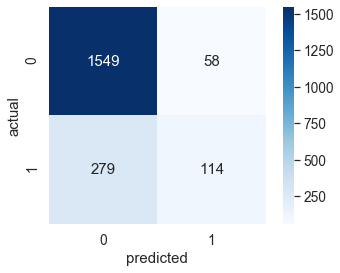

In [167]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_log)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

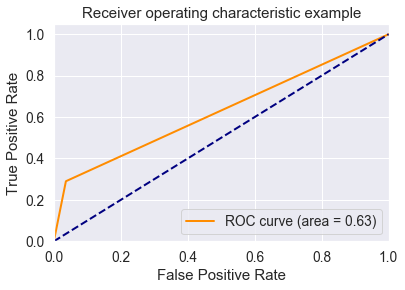

In [168]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_log)
roc_auc = auc(fpr, tpr)
performance_auc['Logistic Regression'] = roc_auc

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [169]:
print('MAE:', metrics.mean_absolute_error(y_test, predicted_log))
print('MSE:', metrics.mean_squared_error(y_test, predicted_log))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted_log)))

MAE: 0.1685
MSE: 0.1685
RMSE: 0.41048751503547587


## Decision tree

A [decision tree](https://en.wikipedia.org/wiki/Decision_tree) is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.

In [170]:
model = DecisionTreeClassifier().fit(X_train, y_train)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [171]:
predicted_dt = model.predict(X_test)
predicted_dt

array([0, 0, 0, ..., 1, 0, 1])

In [172]:
# Confidence score
dectree_score_1 = round(model.score(X_train,y_train) * 100, 2)
print(dectree_score_1)
print(classification_report(y_test, predicted_dt))

100.0
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1607
           1       0.44      0.49      0.46       393

   micro avg       0.78      0.78      0.78      2000
   macro avg       0.66      0.67      0.66      2000
weighted avg       0.79      0.78      0.78      2000



<module 'matplotlib.pyplot' from '/Users/marcusrb/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

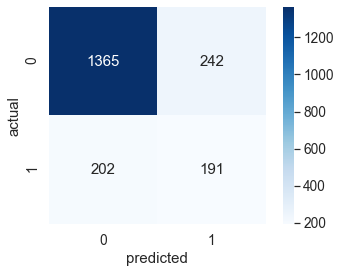

In [173]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_dt)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

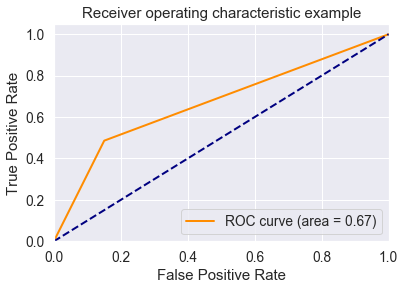

In [174]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_dt)
roc_auc = auc(fpr, tpr)
performance_auc['Decision Tree'] = roc_auc

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [175]:
pd.concat((pd.DataFrame(X_train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(model.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
0,Gender,0.158879
4,CountryLocation_France,0.144035
13,NumOfProducts_3,0.087733
30,AgeGroup_Mid-Senior,0.081383
12,NumOfProducts_2,0.059318
3,score_norm,0.050694
31,AgeGroup_Senior,0.035907
33,GamesBalanceGroup_MEDIUM,0.024972
6,CountryLocation_Spain,0.018968
2,IsActiveMember,0.018513


In [176]:
print('MAE:', metrics.mean_absolute_error(y_test, predicted_dt))
print('MSE:', metrics.mean_squared_error(y_test, predicted_dt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted_dt)))

MAE: 0.222
MSE: 0.222
RMSE: 0.47116875957558985


## Random forest

[Random forests](https://en.wikipedia.org/wiki/Random_forest) or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

In [177]:
model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0).fit(X_train, y_train)
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [178]:
predicted_rf = model.predict(X_test)
predicted_rf

array([0, 0, 0, ..., 0, 0, 0])

In [179]:
# Confidence score
randfor_score_1 = round(model.score(X_train,y_train) * 100, 2)
print(randfor_score_1)
print(classification_report(y_test, predicted_rf))

79.45
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

   micro avg       0.80      0.80      0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



<module 'matplotlib.pyplot' from '/Users/marcusrb/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

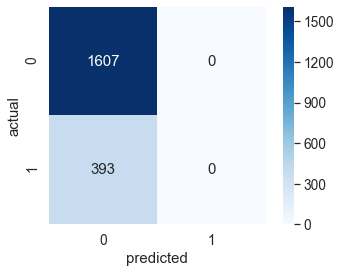

In [180]:
matrix = confusion_matrix(y_test, predicted_rf)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

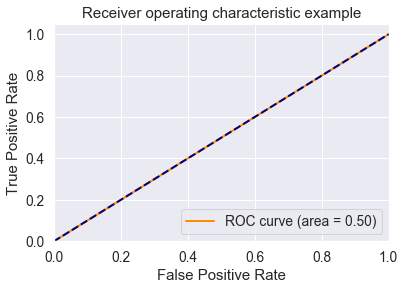

In [181]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_rf)
roc_auc = auc(fpr, tpr)
performance_auc['Random Forests'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [182]:
pd.concat((pd.DataFrame(X_train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(model.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
13,NumOfProducts_3,0.241237
30,AgeGroup_Mid-Senior,0.181807
14,NumOfProducts_4,0.135804
28,AgeGroup_Young Adult,0.100308
31,AgeGroup_Senior,0.074345
3,score_norm,0.060471
6,CountryLocation_Spain,0.056841
15,Tenure_0,0.046597
12,NumOfProducts_2,0.042648
1,HasPremiumAccess,0.015618


## k-nearest neighbors

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression.[1] In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.
k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification.

source [wikipedia - k-nearest neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

In [183]:
model = KNeighborsClassifier(3).fit(X_train, y_train)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [184]:
predicted_knn = model.predict(X_test)
predicted_knn

array([0, 0, 0, ..., 0, 0, 0])

In [185]:
# Confidence score
knn_score_1 = round(model.score(X_train,y_train) * 100, 2)
print(knn_score_1)
print(classification_report(y_test, predicted_knn))

84.59
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1607
           1       0.21      0.10      0.13       393

   micro avg       0.75      0.75      0.75      2000
   macro avg       0.51      0.50      0.49      2000
weighted avg       0.69      0.75      0.71      2000



<module 'matplotlib.pyplot' from '/Users/marcusrb/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

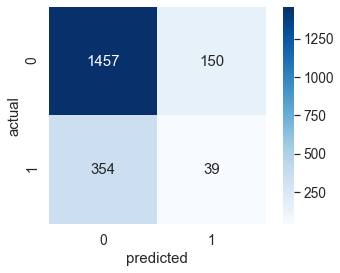

In [186]:
matrix = confusion_matrix(y_test, predicted_knn)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

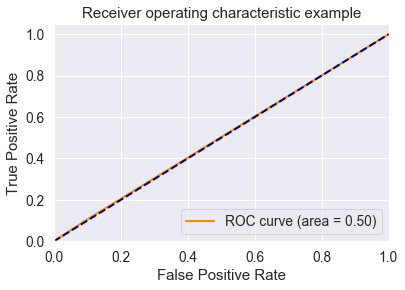

In [187]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_knn)
roc_auc = auc(fpr, tpr)
performance_auc['k-nearest neighbours'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [188]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
6340    0
576     0
5202    1
6363    0
439     0
2750    1
7487    1
5272    1
5653    0
3999    0
6033    0
582     0
9930    0
7051    0
8158    0
9896    0
2249    0
4640    1
9485    0
4947    0
9920    1
1963    0
8243    0
6590    0
8847    0
       ..
4848    0
2291    0
2133    0
550     0
1740    0
5289    0
1817    0
4698    0
5181    0
3018    0
17      0
1770    1
1888    0
2152    1
1642    0
7846    0
4193    0
9432    0
8898    0
533     0
132     0
7722    0
8458    0
964     1
8719    0
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Churn, Length: 2000, dtype: int64

## Support Vector Machines

In machine learning, support-vector machines (SVMs, also support-vector networks[1]) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.

source [wikipedia - SVM](https://en.wikipedia.org/wiki/Support-vector_machine)

In [189]:
model = SVC(probability=True).fit(X_train, y_train)
model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [190]:
predicted_sv = model.predict(X_test)
predicted_sv

array([0, 0, 0, ..., 0, 0, 0])

In [191]:
# Confidence score
svm_score_1 = round(model.score(X_train,y_train) * 100, 2)
print(svm_score_1)
print(classification_report(y_test, predicted_sv))

80.14
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

   micro avg       0.80      0.80      0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.65      0.80      0.71      2000



<module 'matplotlib.pyplot' from '/Users/marcusrb/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

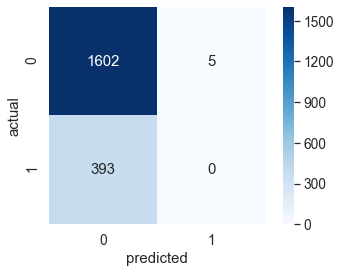

In [192]:
matrix = confusion_matrix(y_test, predicted_sv)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

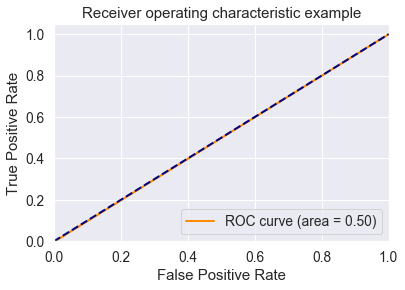

In [193]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_sv)
roc_auc = auc(fpr, tpr)
performance_auc['SVM'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Conclusion and Model Evaluation first part

After applying different classification models, and seeing that there are not too many differences in performance between them, the one that has given us the best result with the metric we have chosen has been that of Support Vector Machines.

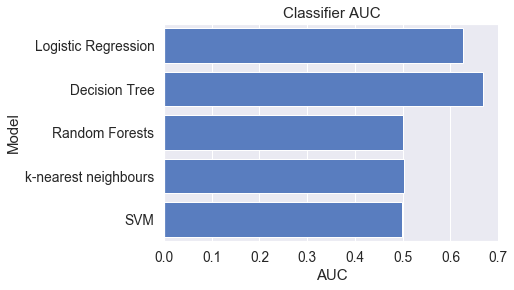

In [194]:
perf = pd.DataFrame.from_dict(performance_auc, orient='index')
perf['Model'] = perf.index
perf['AUC'] = perf[0]
plt.xlabel('AUC')
plt.title('Classifier AUC')
sns.set_color_codes("muted")
sns.barplot(x='AUC', y='Model', data=perf, color="b")

In [196]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree'],
    'Score_1st': [svm_score_1, 
              knn_score_1, 
              logreg_score_1, 
              randfor_score_1,
              dectree_score_1 ]})
models.sort_values(by='Score_1st', ascending=False)

,Model,Score_1st
4,Decision Tree,100.00
1,KNN,84.59
2,Logistic Regression,83.05
0,Support Vector Machines,80.14
3,Random Forest,79.45


## Predictive Modeling - part 2

In this activity we will focus on showing different measures that we can use to evaluate a classification model.

In this second part we use only 15 features

In [197]:
# Split and drop Churn variable
X_train = features_dataset_1.drop('Churn', axis=1)
y_train = features_dataset_1['Churn']


# Create train and test 80-20 with seed fixed to 42 for validation the model
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [198]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 14), (8000,), (2000, 14), (2000,))

We have prepared our dataset and ready for to apply algorithms to predict variable `Churn`:

- Logistic Regression
- Decision Tree
- Random Forests
- k-nearest neigbours
- Support Vector Machines

We use two metrics: confusion matrix and ROC curve. Also we could use other metrics, for instance, in regression problems, we can use others:

Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

1𝑛∑𝑖=1𝑛|𝑦𝑖−𝑦̂ 𝑖|

Mean Squared Error (MSE) is the mean of the squared errors:

1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)2

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)

Comparing these metrics:

MAE is the easiest to understand, because it's the average error. MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world. RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units. All of these are loss functions, because we want to minimize them.

In [199]:
# Create a performance_auc dict
performance_auc = {}

## Logistic Regression

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1 and the sum adding to one.

source [wikipedia - Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)

In [200]:
model = LogisticRegression().fit(X_train, y_train)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [201]:
predicted_log = model.predict(X_test)
predicted_log

array([0, 0, 0, ..., 1, 0, 0])

In [202]:
# Confidence score
logreg_score_2 = round(model.score(X_train,y_train) * 100, 2)

print(logreg_score_2)

print(classification_report(y_test, predicted_log))

84.55
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1607
           1       0.68      0.40      0.51       393

   micro avg       0.85      0.85      0.85      2000
   macro avg       0.77      0.68      0.71      2000
weighted avg       0.83      0.85      0.83      2000



<module 'matplotlib.pyplot' from '/Users/marcusrb/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

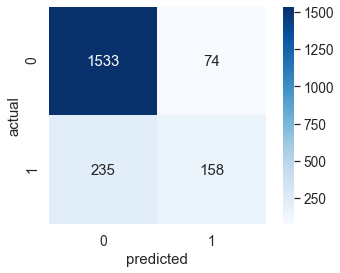

In [203]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_log)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

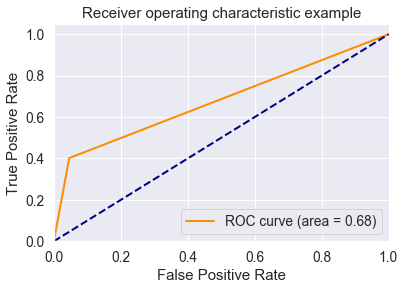

In [204]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_log)
roc_auc = auc(fpr, tpr)
performance_auc['Logistic Regression'] = roc_auc

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [205]:
print('MAE:', metrics.mean_absolute_error(y_test, predicted_log))
print('MSE:', metrics.mean_squared_error(y_test, predicted_log))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted_log)))

MAE: 0.1545
MSE: 0.1545
RMSE: 0.3930648801406709


## Decision tree

A [decision tree](https://en.wikipedia.org/wiki/Decision_tree) is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.

In [206]:
performance_auc

{'Logistic Regression': 0.6779935428809392}

In [207]:
model = DecisionTreeClassifier().fit(X_train, y_train)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [208]:
predicted_dt = model.predict(X_test)
predicted_dt

array([0, 0, 0, ..., 1, 0, 0])

In [209]:
# Confidence score
dectree_score_2 = round(model.score(X_train,y_train) * 100, 2)
print(dectree_score_2)
print(classification_report(y_test, predicted_dt))

86.24
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1607
           1       0.72      0.40      0.52       393

   micro avg       0.85      0.85      0.85      2000
   macro avg       0.79      0.68      0.72      2000
weighted avg       0.84      0.85      0.84      2000



<module 'matplotlib.pyplot' from '/Users/marcusrb/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

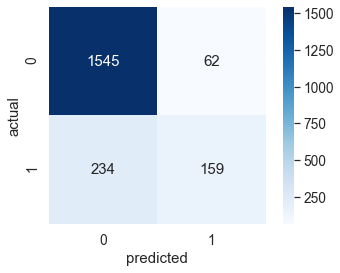

In [210]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_dt)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

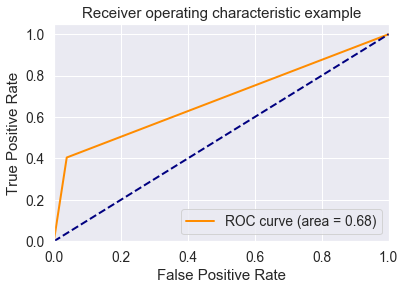

In [211]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_dt)
roc_auc = auc(fpr, tpr)
performance_auc['Decision Tree'] = roc_auc

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [212]:
pd.concat((pd.DataFrame(X_train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(model.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
0,NumOfProducts_3,0.216190
1,NumOfProducts_1,0.193271
3,CountryLocation_Germany,0.110673
2,AgeGroup_Mid-Senior,0.107146
4,NumOfProducts_4,0.066441
5,Gender,0.064494
8,GamesBalanceGroup_HIGH,0.058386
7,GamesBalanceGroup_INTERMEDIATE,0.038289
6,GamesBalanceGroup_MEDIUM,0.037218
13,NaN,0.035873


In [213]:
print('MAE:', metrics.mean_absolute_error(y_test, predicted_dt))
print('MSE:', metrics.mean_squared_error(y_test, predicted_dt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted_dt)))

MAE: 0.148
MSE: 0.148
RMSE: 0.3847076812334269


## Random forest

[Random forests](https://en.wikipedia.org/wiki/Random_forest) or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

In [214]:
model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0).fit(X_train, y_train)
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [215]:
predicted_rf = model.predict(X_test)
predicted_rf

array([0, 0, 0, ..., 0, 0, 0])

In [216]:
# Confidence score
randfor_score_2 = round(model.score(X_train,y_train) * 100, 2)
print(randfor_score_2)
print(classification_report(y_test, predicted_rf))

79.57
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       1.00      0.01      0.01       393

   micro avg       0.80      0.80      0.80      2000
   macro avg       0.90      0.50      0.45      2000
weighted avg       0.84      0.80      0.72      2000



<module 'matplotlib.pyplot' from '/Users/marcusrb/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

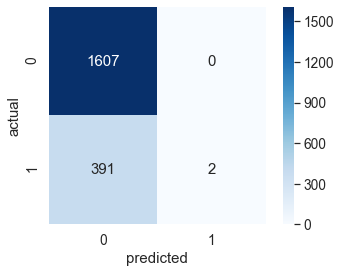

In [217]:
matrix = confusion_matrix(y_test, predicted_rf)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

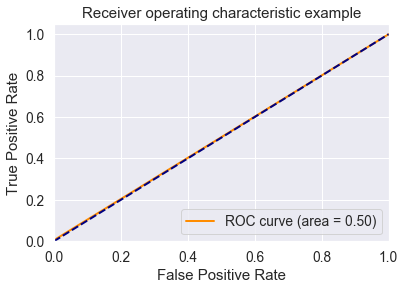

In [218]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_rf)
roc_auc = auc(fpr, tpr)
performance_auc['Random Forests'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [219]:
pd.concat((pd.DataFrame(X_train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(model.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
1,NumOfProducts_1,0.271591
0,NumOfProducts_3,0.223383
3,CountryLocation_Germany,0.166032
2,AgeGroup_Mid-Senior,0.154560
4,NumOfProducts_4,0.079962
5,Gender,0.052730
6,GamesBalanceGroup_MEDIUM,0.028100
7,GamesBalanceGroup_INTERMEDIATE,0.011952
8,GamesBalanceGroup_HIGH,0.007128
9,ScoreGroup_BRONCE,0.003008


## k-nearest neighbors

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression.[1] In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.
k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification.

source [wikipedia - k-nearest neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

In [220]:
model = KNeighborsClassifier(3).fit(X_train, y_train)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [221]:
predicted_knn = model.predict(X_test)
predicted_knn

array([0, 0, 0, ..., 1, 0, 0])

In [222]:
# Confidence score
knn_score_2 = round(model.score(X_train,y_train) * 100, 2)
print(knn_score_2)
print(classification_report(y_test, predicted_knn))

81.21
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1607
           1       0.49      0.47      0.48       393

   micro avg       0.80      0.80      0.80      2000
   macro avg       0.68      0.67      0.68      2000
weighted avg       0.80      0.80      0.80      2000



<module 'matplotlib.pyplot' from '/Users/marcusrb/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

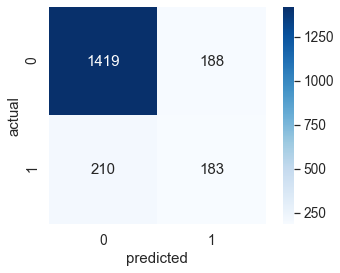

In [223]:
matrix = confusion_matrix(y_test, predicted_knn)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

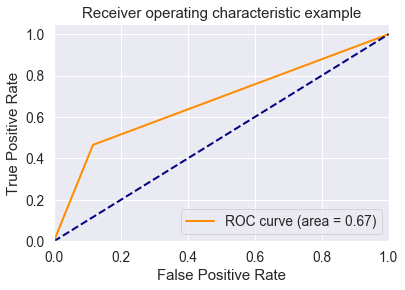

In [224]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_knn)
roc_auc = auc(fpr, tpr)
performance_auc['k-nearest neighbours'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Support Vector Machines

In machine learning, support-vector machines (SVMs, also support-vector networks[1]) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.

source [wikipedia - SVM](https://en.wikipedia.org/wiki/Support-vector_machine)

In [225]:
model = SVC(probability=True).fit(X_train, y_train)
model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [226]:
predicted_sv = model.predict(X_test)
predicted_sv

array([0, 0, 0, ..., 1, 0, 0])

In [227]:
# Confidence score
svm_score_2 = round(model.score(X_train,y_train) * 100, 2)
print(svm_score_2)
print(classification_report(y_test, predicted_sv))

83.9
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1607
           1       0.62      0.43      0.51       393

   micro avg       0.84      0.84      0.84      2000
   macro avg       0.75      0.68      0.71      2000
weighted avg       0.82      0.84      0.83      2000



<module 'matplotlib.pyplot' from '/Users/marcusrb/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

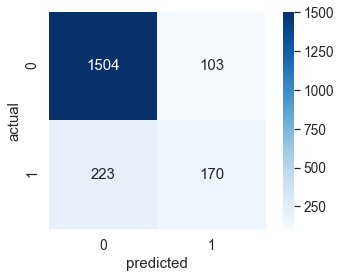

In [228]:
matrix = confusion_matrix(y_test, predicted_sv)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

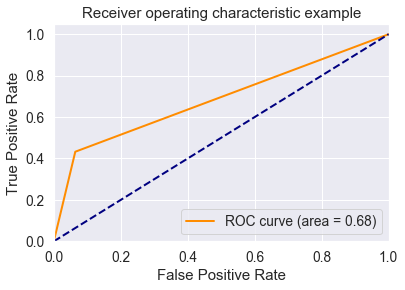

In [229]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_sv)
roc_auc = auc(fpr, tpr)
performance_auc['SVM'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Conclusion and Model Evaluation

After applying different classification models, and seeing that there are not too many differences in performance between them, the one that has given us the best result with the metric we have chosen has been that of Support Vector Machines.

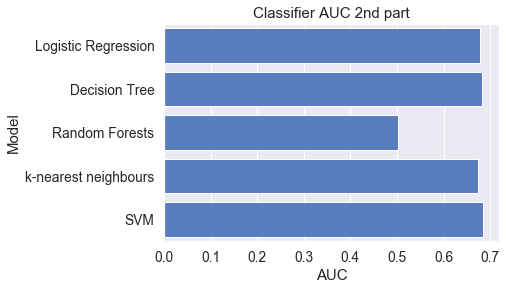

In [230]:
perf = pd.DataFrame.from_dict(performance_auc, orient='index')
perf['Model'] = perf.index
perf['AUC'] = perf[0]
plt.xlabel('AUC')
plt.title('Classifier AUC 2nd part')
sns.set_color_codes("muted")
sns.barplot(x='AUC', y='Model', data=perf, color="b")

In [232]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree'],
    'Score_2nd': [svm_score_2, 
              knn_score_2, 
              logreg_score_2, 
              randfor_score_2,
              dectree_score_2 ]})
models.sort_values(by='Score_2nd', ascending=False)

,Model,Score_2nd
4,Decision Tree,86.24
2,Logistic Regression,84.55
0,Support Vector Machines,83.90
1,KNN,81.21
3,Random Forest,79.57


## Comparison the all features vs 15 features

In [236]:
models_t = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree'],
    'Score_1st': [svm_score_1, 
              knn_score_1, 
              logreg_score_1, 
              randfor_score_1,
              dectree_score_1 ],
    'Score_2nd': [svm_score_2, 
              knn_score_2, 
              logreg_score_2, 
              randfor_score_2,
              dectree_score_2 ]})
models_t.sort_values(by='Score_2nd', ascending=False)

,Model,Score_1st,Score_2nd
4,Decision Tree,100.00,86.24
2,Logistic Regression,83.05,84.55
0,Support Vector Machines,80.14,83.90
1,KNN,84.59,81.21
3,Random Forest,79.45,79.57


> Decision tree is the best algorithm used in our model. When we selected 15 features only, we improve the score. Anyway, we cannot use all parameters and settings for each algorithm, neither used all combining features.

### Solution on Spark framework

To solve a real time problem, we suggest a good solution on Spark framework, this example extract from Spark tutorial and used on Hadoop ecosystem from AWS, GCP or Azure, and main cloud providers.

![](img/Pasos_proceso_detección_Churn.jpg)
![](https://github.com/marcusRB/datascience/blob/master/Churn%20Prediction/img/Pasos_proceso_detecci%C3%B3n_Churn.jpg?raw=true)

***
### Validate with Logistic Regression model

In [ ]:
# Testing with Logistic Regression
model = LogisticRegression().fit(X_train, y_train)
predicted_log = model.predict(X_val)
predicted_log

In [ ]:
predicted_log.shape

In [ ]:
# We submit predicted model results
#output = pd.DataFrame({
#        "CustomerId": y_val['ids'],
#        "Churn": predicted_log
#    })
#submission.to_csv('submission_dt_4.csv', index=False)

In [ ]:
#submission.head(10)

## Final Thoughts

Churn rate is a health indicator for subscription-based companies. The ability to identify customers that aren’t happy with provided solutions allows businesses to learn about product or pricing plan weak points, operation issues, as well as customer preferences and expectations to proactively reduce reasons for churn.

It’s important to define data sources and observation period to have a full picture of the history of customer interaction. Selection of the most significant features for a model would influence its predictive performance: The more qualitative the dataset, the more precise forecasts are.

Companies with a large customer base and numerous offerings would benefit from customer segmentation. The number and choice of ML models may also depend on segmentation results. Data scientists also need to monitor deployed models, and revise and adapt features to maintain the desired level of prediction accuracy.